# Graph generation for different Dashboard Prototypes
This notebook generates various type of graphs which will be used in different kind of prototype to conduct a study to investigate understanding aspect from teacher's perspective.
We are considering three type of dashboard design
1. Zoom
2. Teacher Driven
3. Story Telling

### Loading the file and computing the dimensions

In [126]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt




# Load Project days dataset file 
data_8nov = pd.read_csv('ProcessedData_ProjectDay_20171108.csv')
data_22nov = pd.read_csv('ProcessedData_ProjectDay_20171122.csv')
data_18oct = pd.read_csv('ProcessedData_ProjectDay_20171018.csv')

groups_info = {}

# combined data
data_all = data_8nov.append([data_22nov,data_18oct])



print 'Entire dataset:',data_all.shape

groups_info ['2017-11-08'] = data_8nov.group.unique()
groups_info ['2017-11-22'] = data_22nov.group.unique()
groups_info ['2017-10-18'] =  data_18oct.group.unique()

data_all.to_csv('Data_all.csv')
data_all.dropna(how='any',inplace=True)
print data_all.shape

Entire dataset: (265, 13)
(204, 13)


## 1.  Graphs for Zoom dashboard type
For Zoom dashboard, we are generating following graph for our project days dataset
1. A table with the overall (average) values of Dim.1, Dim.2 for each group (to show the big numbers)
2. A linegraph with the Dim.1 values of a group over time. Same for Dim.2
3. A linegraph with the average Dim.1 values of all the groups in the class. Same for Dim.2 (to show when no group is selected)
4. A (horizontal bargraph?) of the correlations of Dim.1 with the different original raw data dimensions. Same for Dim.2

### 1.1 Table with overall values for Dim 1, Dim 2 for each group

In [2]:
# Reading MFA results ( An external python script used to apply MFA )
mfa_results = pd.read_csv('mfaresult_Data_all.csv')

# deleting sequence number
mfa_results.drop(mfa_results.columns[0],axis=1,inplace=True)

print data_all.shape
print mfa_results.shape
data_all['mfa-1'] = mfa_results.iloc[:,0]
data_all['mfa-2'] = mfa_results.iloc[:,1]


(204, 13)
(204, 2)


In [3]:
min_dim1 = data_all['mfa-1'].min()
max_dim1 = data_all['mfa-1'].max()

min_dim2 = data_all['mfa-2'].min()
max_dim2 = data_all['mfa-2'].max()

In [4]:
data_all['timestamp'] = pd.to_datetime(data_all['timestamp'])


In [5]:
from datetime import datetime

print 'Average value for dim-1 and dim-2 for each group '
for key in groups_info.keys():
    
    d = datetime.strptime(key,'%Y-%m-%d')
    print '   Date:',d.day,d.month,d.year
    temp_frame = data_all.loc[data_all['timestamp'].dt.day == d.day,:]
    for group in temp_frame.group.unique():
        temp_g = temp_frame.loc[temp_frame.group == group,:]
        print group,' ',temp_g['mfa-1'].mean(),temp_g['mfa-2'].mean()

Average value for dim-1 and dim-2 for each group 
   Date: 8 11 2017
1ABCD   0.724245776463 0.359896871445
2ABCD   0.957848575681 0.149355960071
3ABCDE   -0.0546611096479 0.285618090359
4ABCDE   -0.445168555197 1.41787035703
   Date: 18 10 2017
1AB   0.660004124887 0.239540461226
1CD   1.06232201641 0.27306480463
1GF   0.215483263118 0.509611091382
1HI   -0.43286323152 -0.0279721110744
2ABC   -0.543686664669 1.02744991081
2DE   -0.926723549131 -0.0913384180394
2FGH   -0.995121857065 0.192856433495
2IJ   -1.03005942719 0.733225750614
3AB   -0.561543963075 0.0467086585105
3CD   -0.299682718874 0.0492178218819
   Date: 22 11 2017
2ABCD   -0.680173376976 0.639412040457
3ABCD   -0.673131364338 0.0533376308945
4ABCD   -0.724309253742 0.0277111455322


### 1.2 Line graph for dim-1 over time for each group

   Date: 18 10 2017
['1AB' '1CD' '1GF' '1HI' '2ABC' '2DE' '2FGH' '2IJ' '3AB' '3CD']


<IPython.core.display.Javascript object>


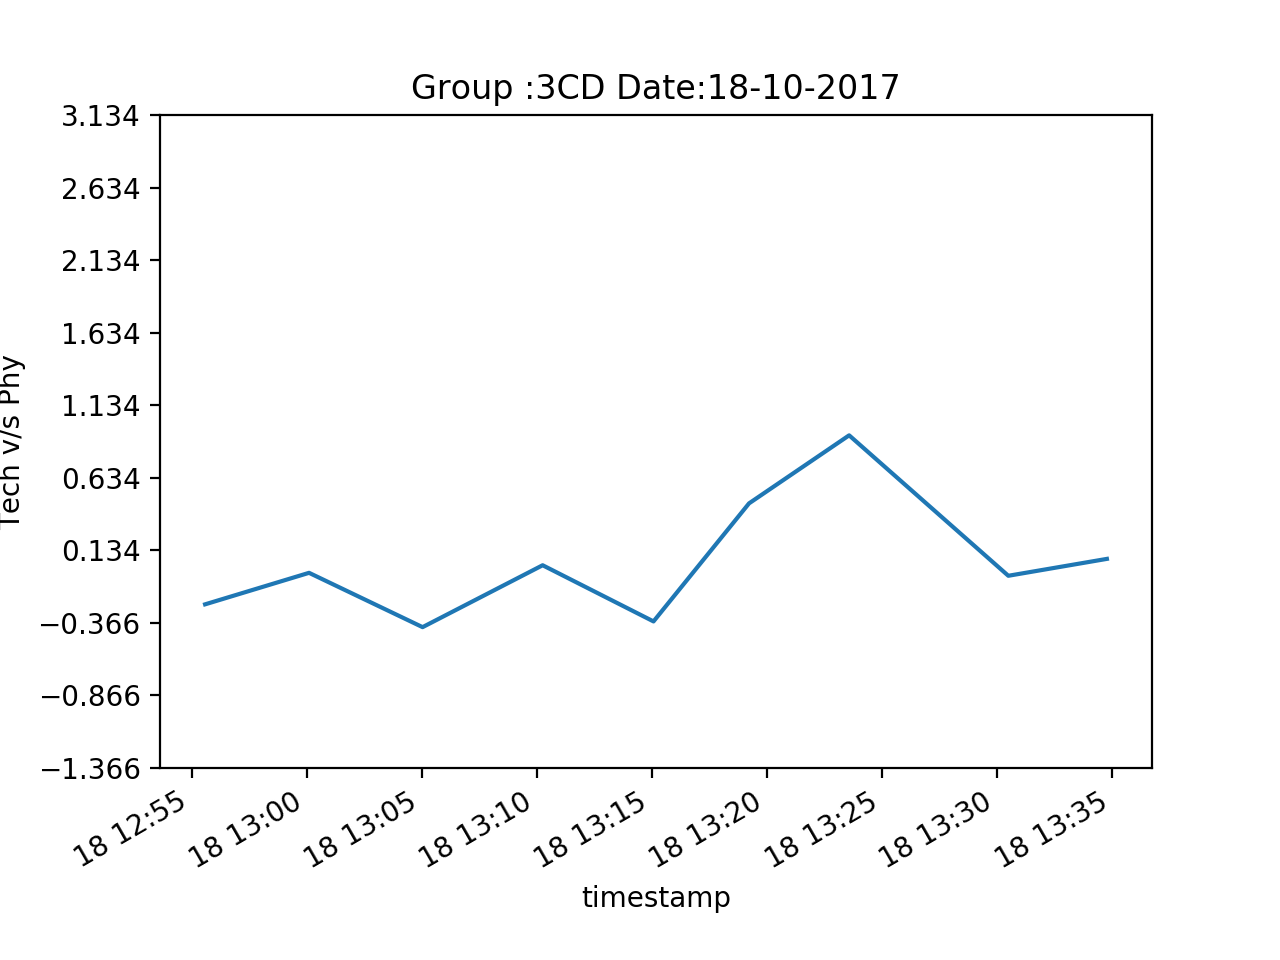

In [6]:
% matplotlib notebook
key = '2017-10-18'

d = datetime.strptime(key,'%Y-%m-%d')
print '   Date:',d.day,d.month,d.year
temp_frame = data_all.loc[data_all['timestamp'].dt.day == d.day,:]
print temp_frame.group.unique()
group = '3CD'
temp_g = temp_frame.loc[temp_frame.group == group,:]
temp_g.plot('timestamp','mfa-2',legend=None)
plt.yticks(np.arange(min_dim2,max_dim2+.5,.5))
plt.ylabel('Tech v/s Phy')
plt.title('Group :%s Date:%s-%s-%s'%(group,d.day,d.month,d.year))
plt.savefig('Tech-Phy %s %s-%s'%(group,d.day,d.month))
plt.show()

### 1.3 Line graph for average values of dim-1 and dim-2 for all groups in class

   Date: 22 11 2017


<IPython.core.display.Javascript object>


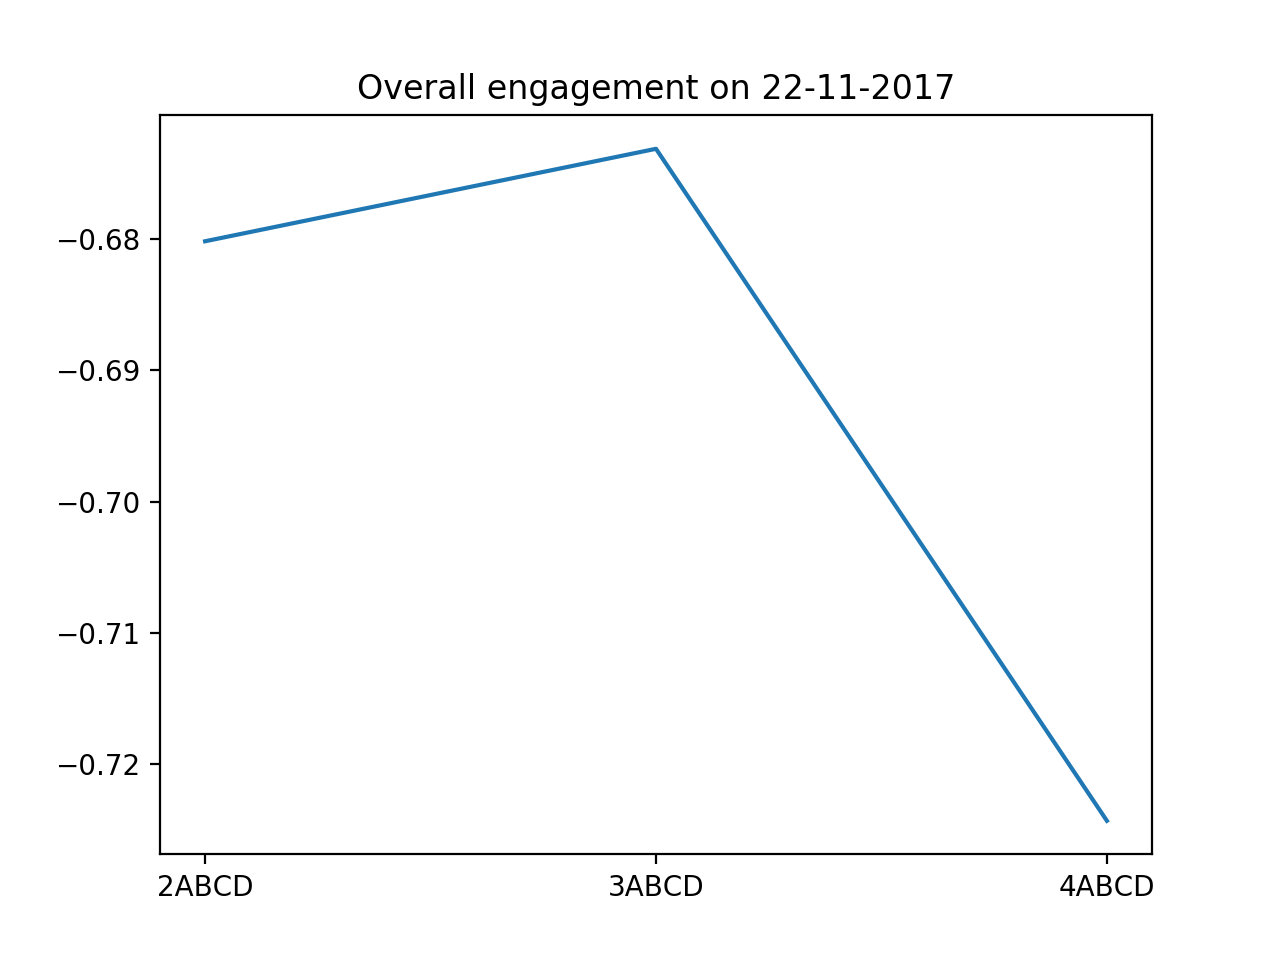

In [7]:
key = '2017-11-22'
    
d = datetime.strptime(key,'%Y-%m-%d')
print '   Date:',d.day,d.month,d.year
groups = []
dim1 = []
dim2 = []
temp_frame = data_all.loc[data_all['timestamp'].dt.day == d.day,:]
for group in temp_frame.group.unique():
    temp_g = temp_frame.loc[temp_frame.group == group,:]
    groups.append(group)
    dim1.append(temp_g['mfa-1'].mean())
    dim2.append(temp_g['mfa-2'].mean())
plt.figure()
plt.plot(groups,dim1)
plt.title('Overall engagement on %s-%s-%s'%(d.day,d.month,d.year))
plt.show()

   Date: 8 11 2017


<IPython.core.display.Javascript object>


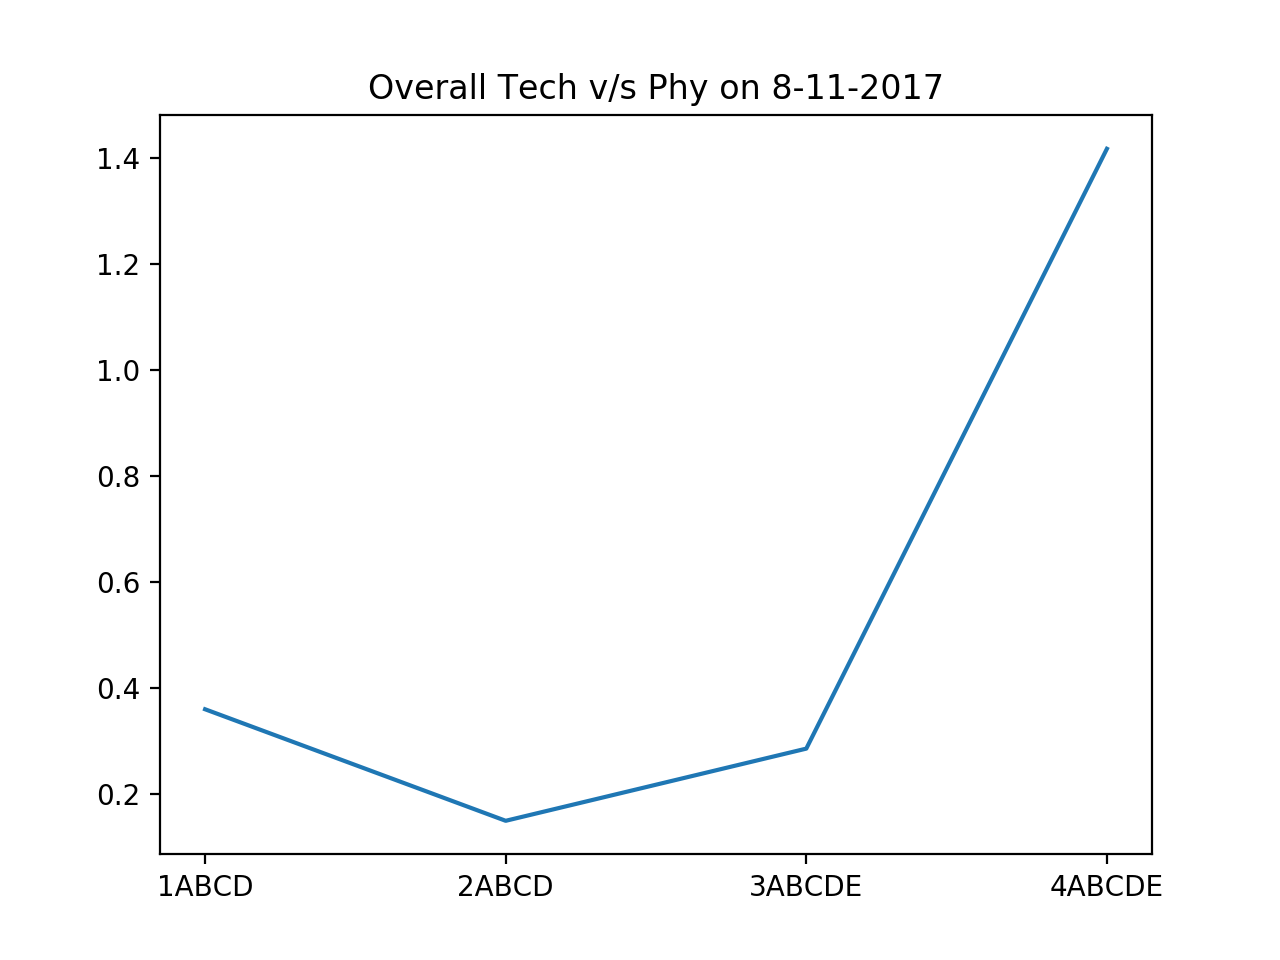

In [8]:
key = '2017-11-08'
    
d = datetime.strptime(key,'%Y-%m-%d')
print '   Date:',d.day,d.month,d.year
groups = []
dim1 = []
dim2 = []
temp_frame = data_all.loc[data_all['timestamp'].dt.day == d.day,:]
for group in temp_frame.group.unique():
    temp_g = temp_frame.loc[temp_frame.group == group,:]
    groups.append(group)
    dim1.append(temp_g['mfa-1'].mean())
    dim2.append(temp_g['mfa-2'].mean())
plt.figure()
plt.plot(groups,dim2)
plt.title('Overall Tech v/s Phy on %s-%s-%s'%(d.day,d.month,d.year))
plt.savefig('Overall tech-phy on %s-%s-%s'%(d.day,d.month,d.year))
plt.show()

In [9]:
data_all.columns

Index([u'Unnamed: 0', u'timestamp', u'group', u'disengaged', u'looking',
       u'talking', u'intTech', u'intRes', u'intExt', u'Accessed', u'Create',
       u'Open', u'Update', u'mfa-1', u'mfa-2'],
      dtype='object')

### 1.4 Horizonal bar graph representing correlation between MFA dim1, dim2 and original data attributes

In [10]:
temp_df = data_all.drop(data_all.columns[0:3],axis=1)
temp_df.columns[0:10]

Index([u'disengaged', u'looking', u'talking', u'intTech', u'intRes', u'intExt',
       u'Accessed', u'Create', u'Open', u'Update'],
      dtype='object')

In [11]:
temp_df.head()

,disengaged,looking,talking,intTech,intRes,intExt,Accessed,Create,Open,Update,mfa-1,mfa-2
0,0.0,0.00,0.0,1.0,0.00,0.50,0.0,0.0,0.0,0.0,-0.728751,1.419954
1,0.0,0.25,0.0,1.0,1.00,0.00,33.0,7.0,15.0,12.0,1.941220,2.552862
2,0.0,0.00,1.0,1.0,1.00,0.75,5.0,0.0,0.0,17.0,1.001177,-0.270731
3,0.0,0.00,1.0,1.0,0.25,0.75,8.0,0.0,3.0,3.0,0.325517,0.327998
4,0.0,0.00,1.0,1.0,0.50,0.50,12.0,2.0,3.0,1.0,0.420934,0.436979


In [12]:
corr_matrix = temp_df.corr()
print corr_matrix

            disengaged   looking   talking   intTech    intRes    intExt  \
disengaged    1.000000  0.161004  0.066580  0.087374 -0.087822  0.140028   
looking       0.161004  1.000000  0.060244 -0.018515  0.283761  0.141155   
talking       0.066580  0.060244  1.000000  0.012488  0.199168  0.176911   
intTech       0.087374 -0.018515  0.012488  1.000000  0.004708  0.194853   
intRes       -0.087822  0.283761  0.199168  0.004708  1.000000  0.226296   
intExt        0.140028  0.141155  0.176911  0.194853  0.226296  1.000000   
Accessed      0.027359 -0.111663 -0.060250  0.296016  0.000096  0.010269   
Create        0.108731  0.067634  0.004509  0.107597  0.053801  0.115695   
Open          0.048670  0.151990 -0.021665  0.160741  0.080699  0.243331   
Update        0.046531  0.137329 -0.059093  0.184737  0.081416  0.256960   
mfa-1         0.173361 -0.046828  0.079832  0.357593  0.084685  0.205605   
mfa-2        -0.124302 -0.052170 -0.233489  0.085212 -0.249371 -0.058518   

           

<IPython.core.display.Javascript object>


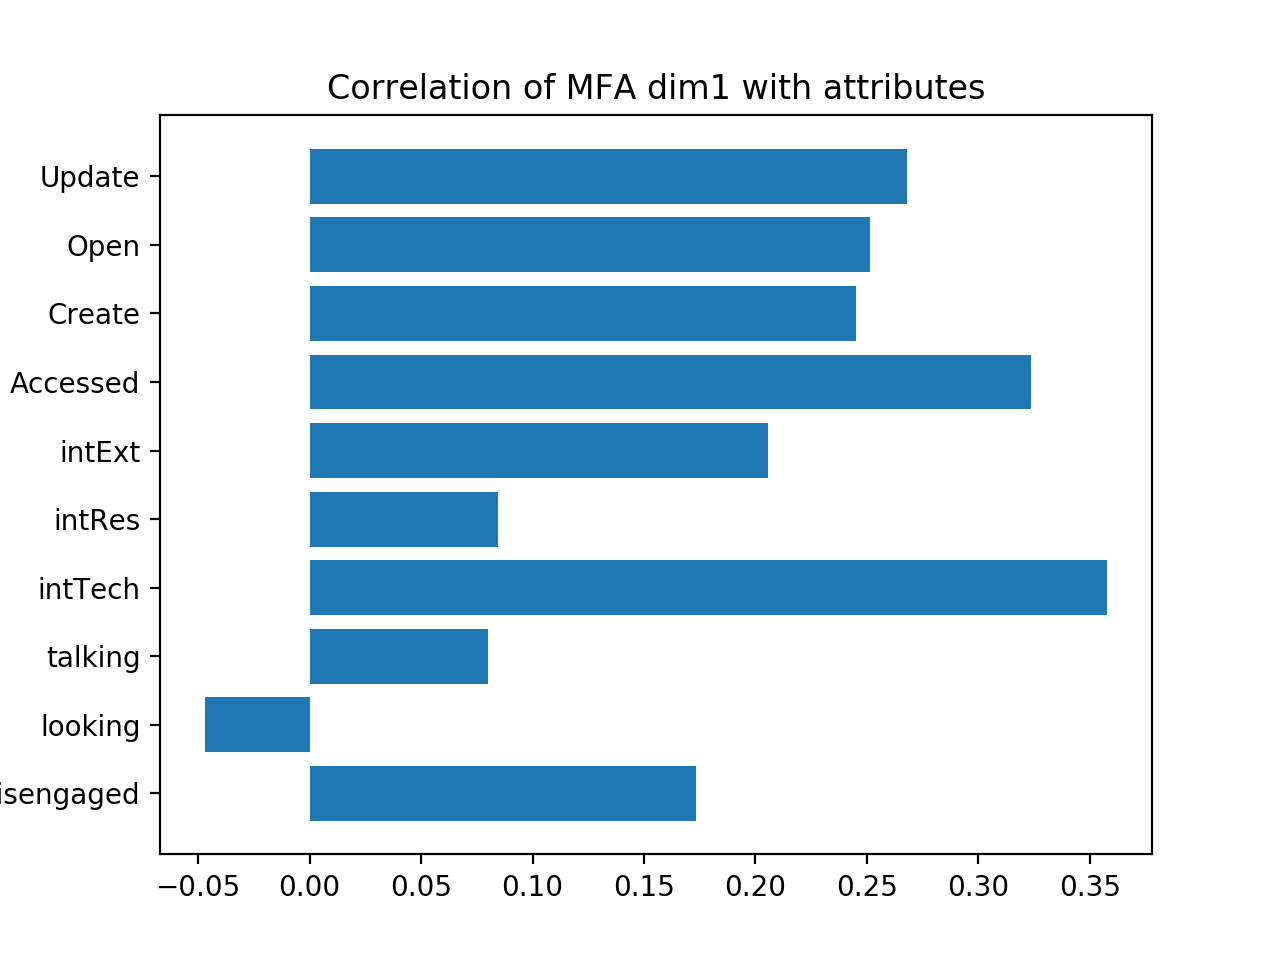

In [13]:
fig, ax = plt.subplots()
attr = [a for a in temp_df.columns[0:10]]
ax.barh(np.arange(len(attr)),corr_matrix['mfa-1'][0:10])
ax.set_yticks(np.arange(len(attr)))
ax.set_yticklabels(attr)
ax.set_title('Correlation of MFA dim1 with attributes')
plt.show()


In [14]:
print attr

['disengaged', 'looking', 'talking', 'intTech', 'intRes', 'intExt', 'Accessed', 'Create', 'Open', 'Update']


<IPython.core.display.Javascript object>


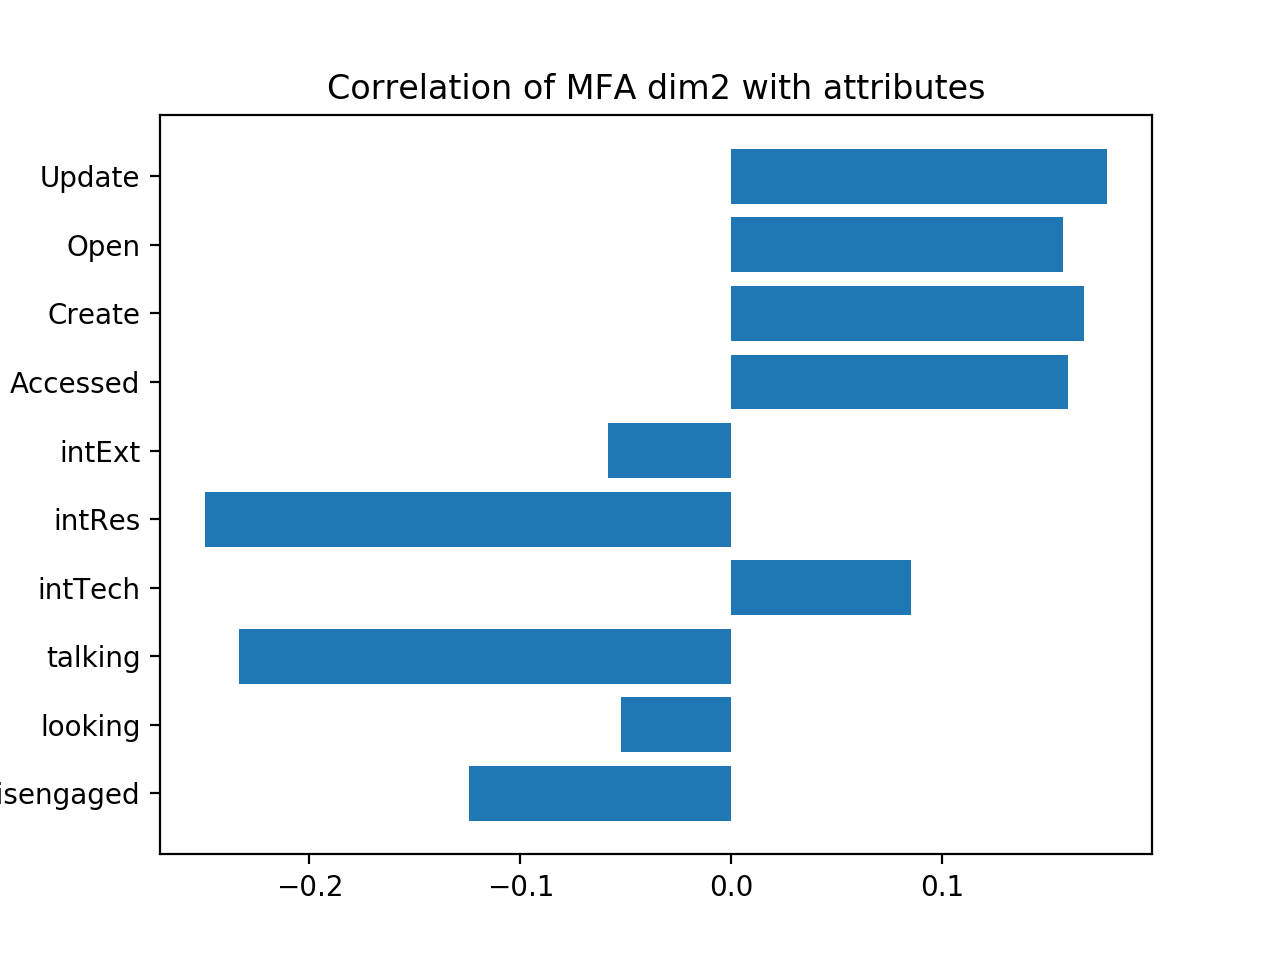

In [15]:
fig, ax = plt.subplots()
attr = [a for a in temp_df.columns[0:10]]
ax.barh(np.arange(len(attr)),corr_matrix['mfa-2'][0:10])
ax.set_title('Correlation of MFA dim2 with attributes')
ax.set_yticks(np.arange(len(attr)))
ax.set_yticklabels(attr)
plt.show()

In [16]:
# MFA correlation with data seperately
def drawCorrelation(datafile,mfafile,date,dim=1):
    data = pd.read_csv(datafile)
    mfar = pd.read_csv(mfafile)
    mfar.drop(mfar.columns[0],axis=1,inplace=True)
    data['mfa-1'] = mfar.iloc[:,0]
    data['mfa-2'] = mfar.iloc[:,1]
    data.drop(data.columns[0:3],axis=1,inplace=True)
    fig, ax = plt.subplots()
    corr_matrix = data.corr()
    attr = [a for a in data.columns[0:10]]
    if dim == 1:
        ax.barh(np.arange(len(attr)),corr_matrix['mfa-1'][0:10])
    else:
        ax.barh(np.arange(len(attr)),corr_matrix['mfa-2'][0:10])
    ax.set_title('Correlation of MFA dim-%d with attributes %s'%(dim,date))
    ax.set_yticks(np.arange(len(attr)))
    ax.set_yticklabels(attr)
    plt.savefig('Corr_MFA dim-%d for %s'%(dim,date))
    plt.show()

<IPython.core.display.Javascript object>


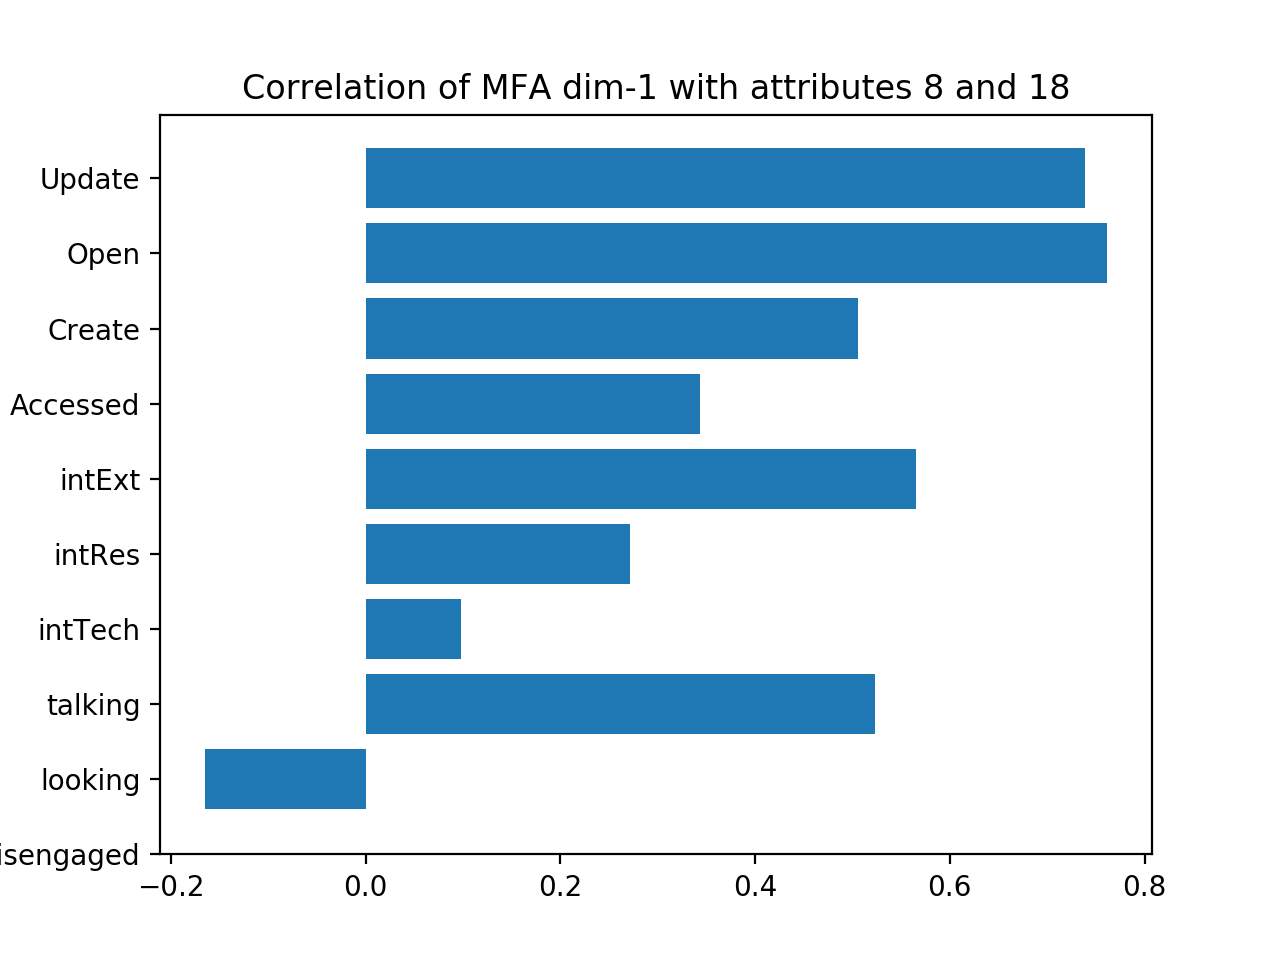

In [19]:
drawCorrelation('Data_both.csv','mfaresult_both.csv','8 and 18',dim=1)

### Correlation for 18-10-2017

<IPython.core.display.Javascript object>


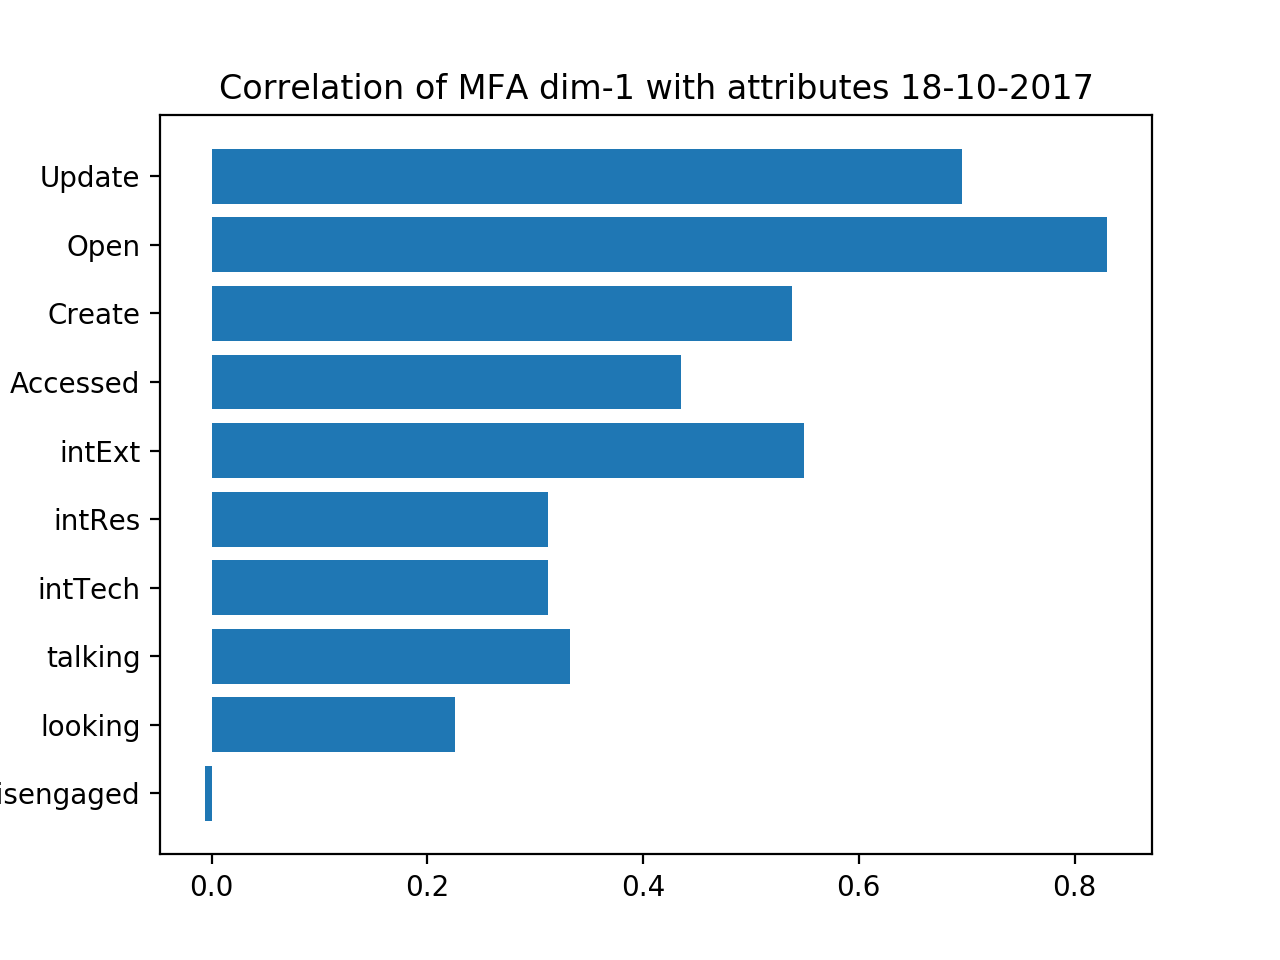

In [25]:
drawCorrelation('ProcessedData_ProjectDay_20171018.csv','mfa_ProjectDay_20171018.csv','18-10-2017',dim=1)

<IPython.core.display.Javascript object>


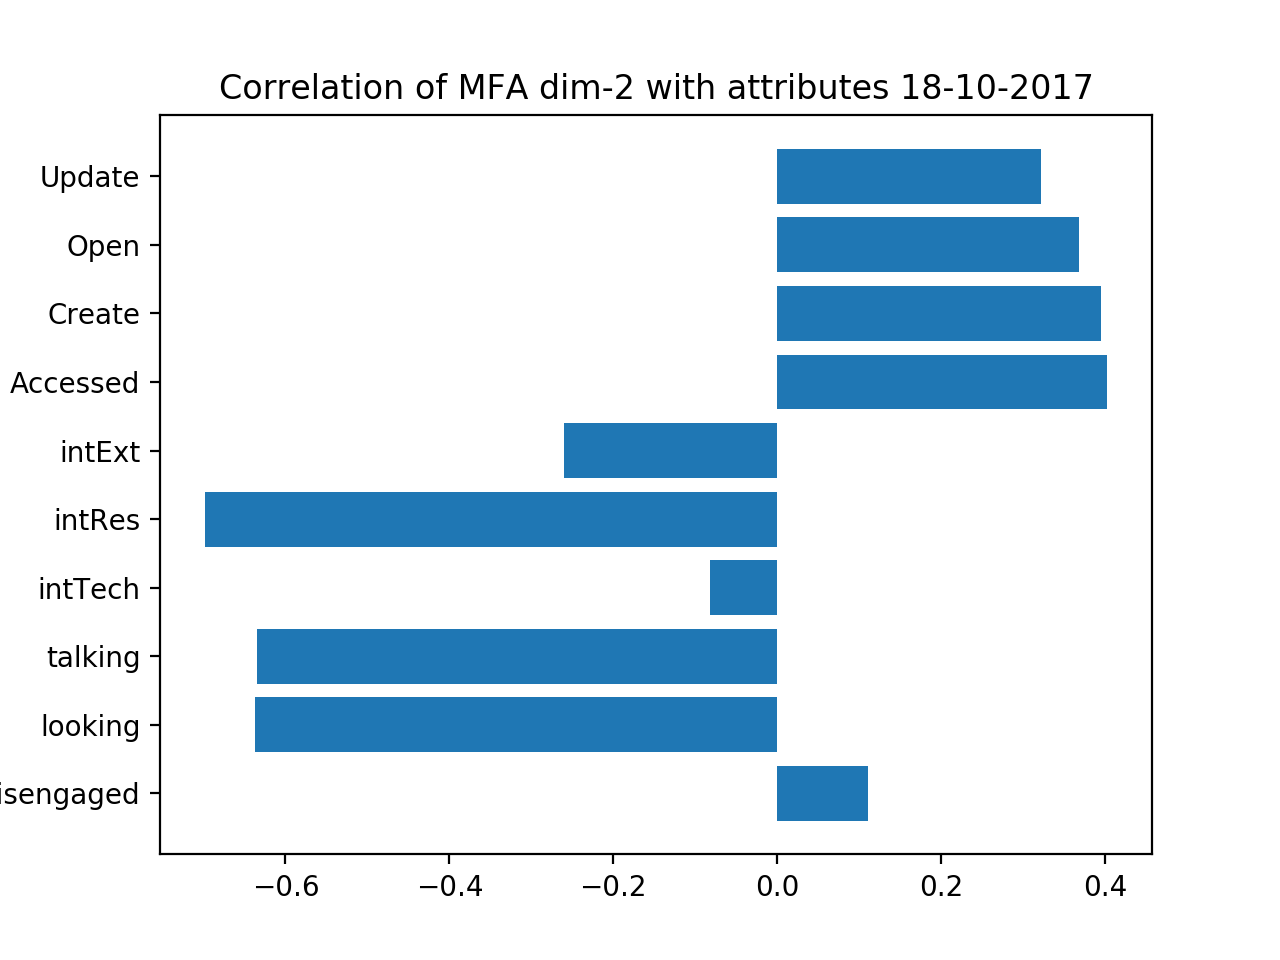

In [26]:
drawCorrelation('ProcessedData_ProjectDay_20171018.csv','mfa_ProjectDay_20171018.csv','18-10-2017',dim=2)

### Correlation for 8-11-2017

<IPython.core.display.Javascript object>


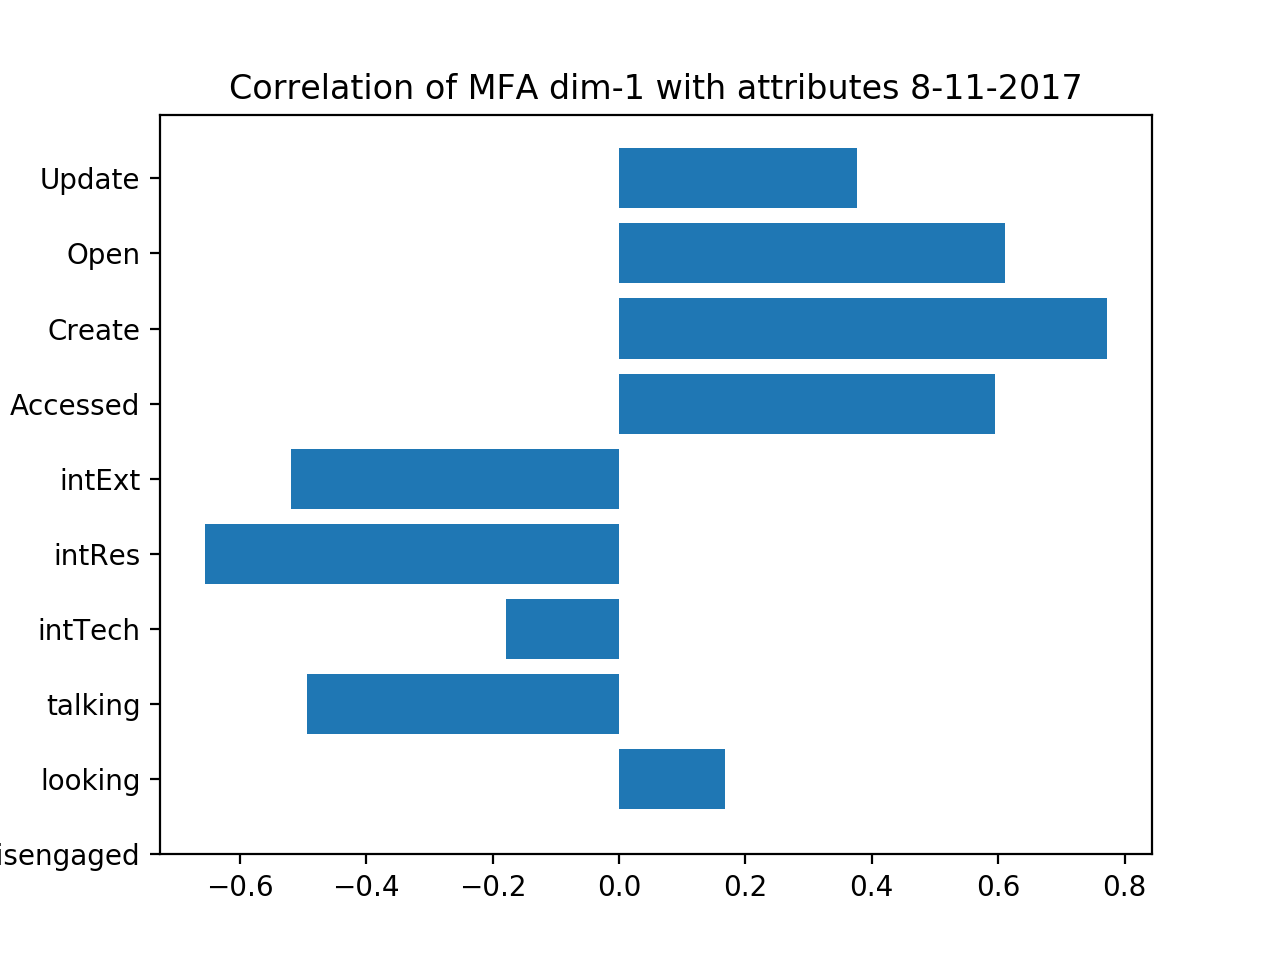

In [27]:
drawCorrelation('ProcessedData_ProjectDay_20171108.csv','mfa_ProjectDay_20171108.csv','8-11-2017',dim=1)

<IPython.core.display.Javascript object>


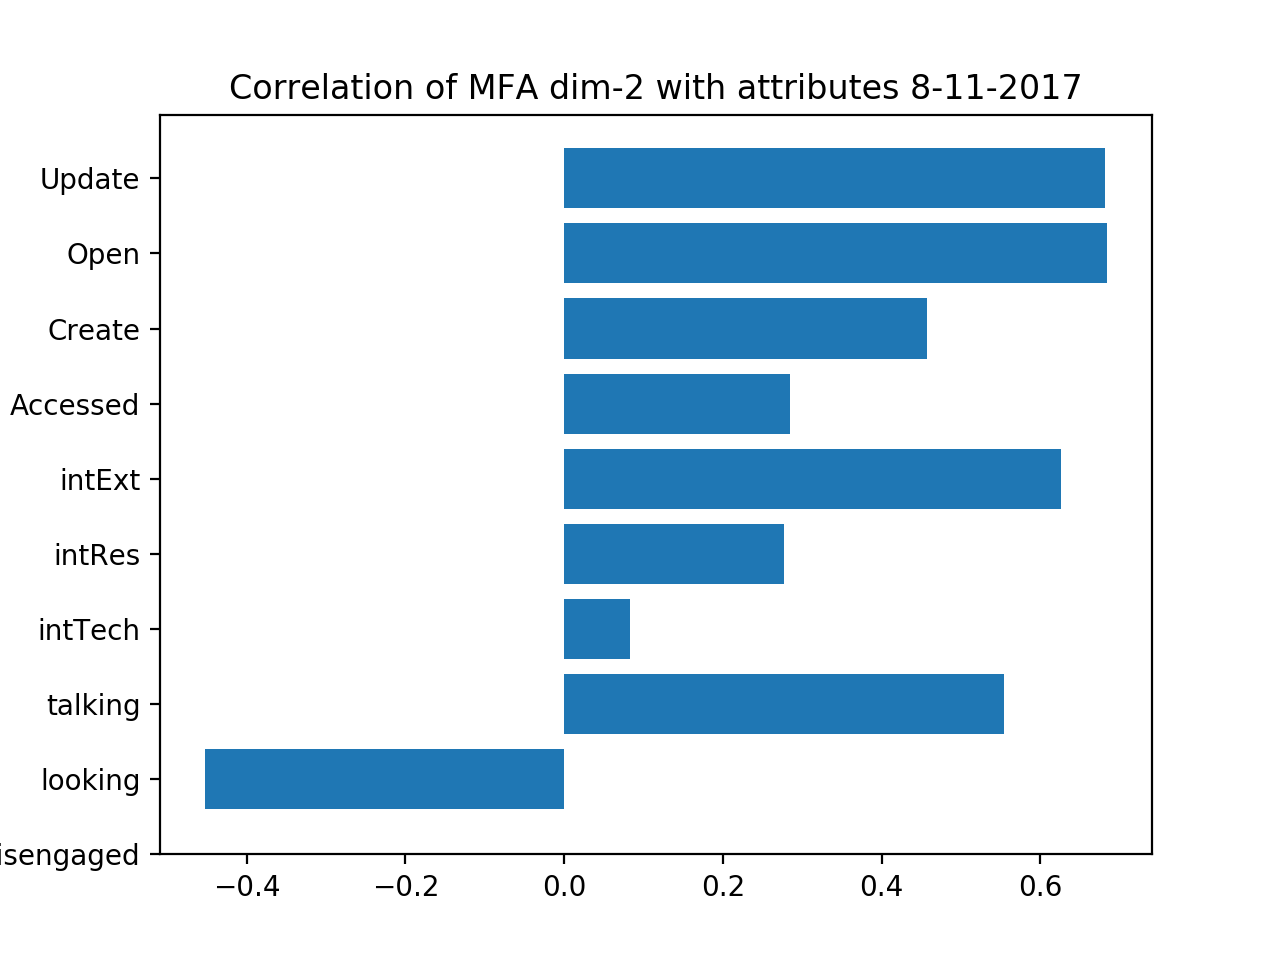

In [28]:
drawCorrelation('ProcessedData_ProjectDay_20171108.csv','mfa_ProjectDay_20171108.csv','8-11-2017',dim=2)

### Correlation for 22-11-2017

<IPython.core.display.Javascript object>


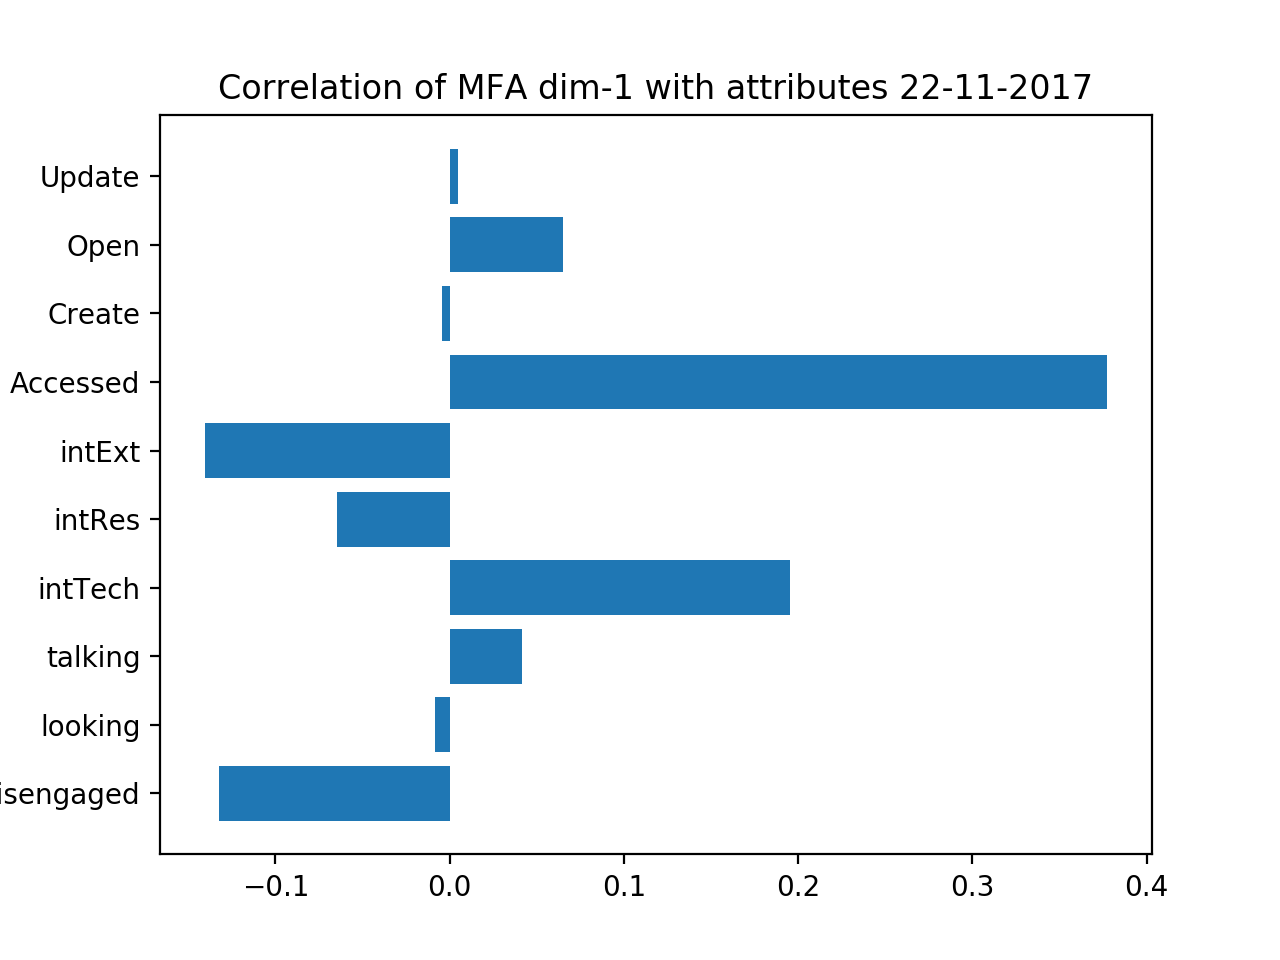

In [29]:
drawCorrelation('ProcessedData_ProjectDay_20171122.csv','mfa_ProjectDay_20171122_dropna.csv','22-11-2017',dim=1)

<IPython.core.display.Javascript object>


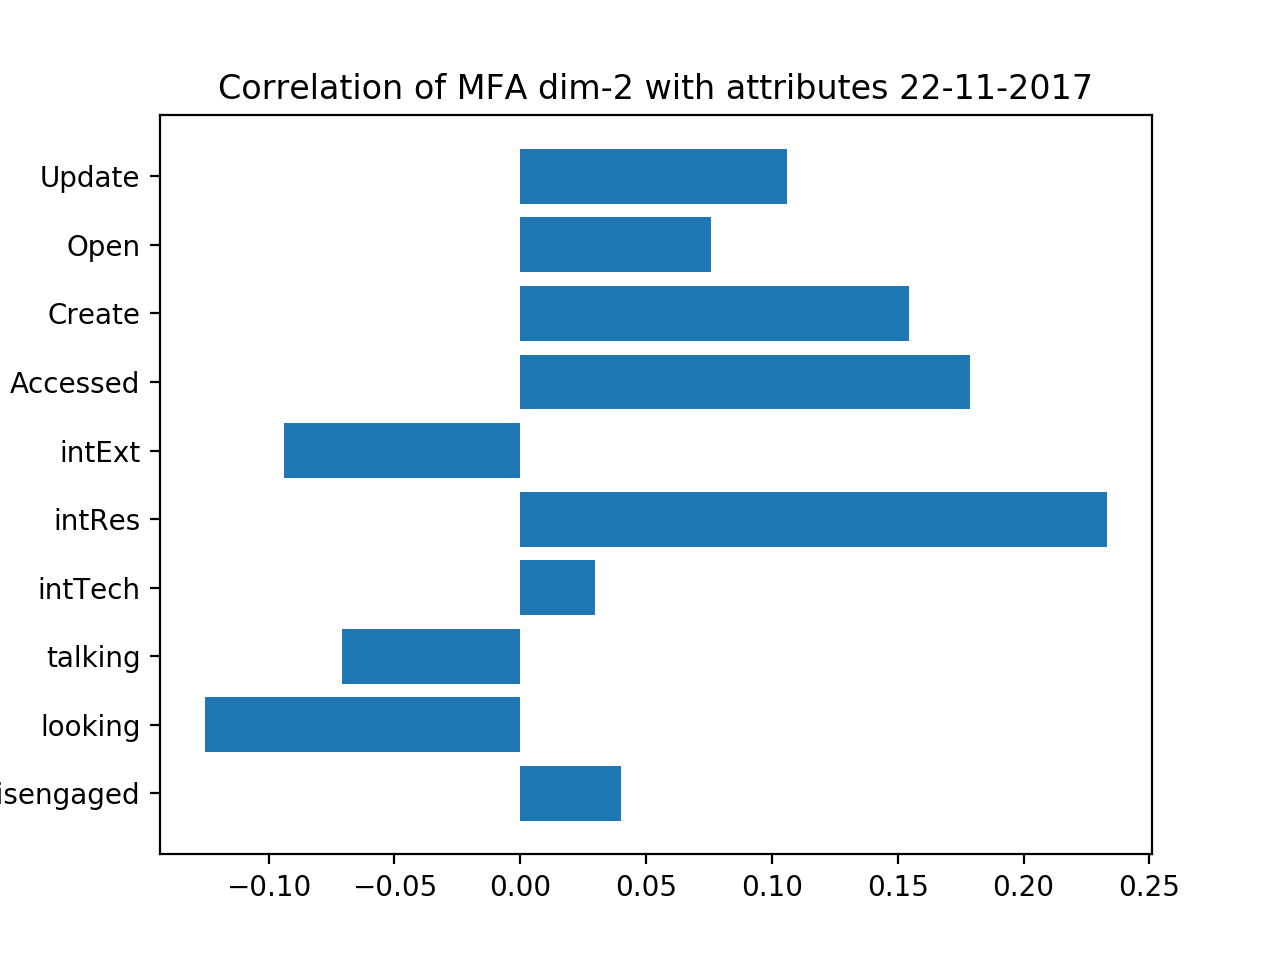

In [30]:
drawCorrelation('ProcessedData_ProjectDay_20171122.csv','mfa_ProjectDay_20171122_dropna.csv','22-11-2017',dim=2)

## 2. Teacher Driven Prototype
This part of notebook is dedicated to generate following graphs
1. A timeline showing each data point we have about a group, with some label saying the timestamp time, number of people, number of observations, number of logs (something like this, not sure how to do it in python). Same for the whole class of each day.
2. Bargraph with the average value of a group, in all the observation dimensions. Same with the average values of logs dimensions for a group.
3. Linegraph with the raw value of a single log/observation dimension, over time. 
4. Linegraph with the sum of all logs dimensions, over time. Same for the sum of all observation dimensions -counting disengaged as negative-, over time

### 2.1 Timeline for each data point for group

In [18]:
def getDuration(df):
    duration = {}
    start_time = {}
    groups = df.group.unique()
    for group in groups:
        tf = df.loc[df.group == group,:]

        # Sorting on basis of timestamp
        sf = tf.sort_values(by="timestamp")

        # Fetch first and last entry for timestamp
        t1 = sf['timestamp'][sf.index[0]]
        t2 = sf['timestamp'][sf.index[-1]]

        # Computer the difference in terms of minutes
        tdf = (pd.to_datetime(t2) - pd.to_datetime(t1))/np.timedelta64(1,'m')

        # Adding duration value in dictionary
        duration[group]=tdf
        start_time[group] = t1
    return duration, start_time

In [16]:
def getInfoProjectDays(df):
# Number of Students and Number of Groups
    total_student=0
    student_group = {}
    groups = df.group.unique()
    for group in groups:
        student_group[group] = len(list(group))-1

    return (student_group)

In [100]:
def getEntries(df):
    logs ={}
    obs = {}
    groups = df.group.unique()
    for group in groups:
        tf = df.loc[df.group == group,:]
        logs[group] = tf.shape[0] - sum(tf.Accessed.isna())
        obs[group] =  tf.shape[0] - sum(tf.looking.isna())
    return logs,obs

In [99]:
# Extracting information for each group


(147, 13)


<IPython.core.display.Javascript object>


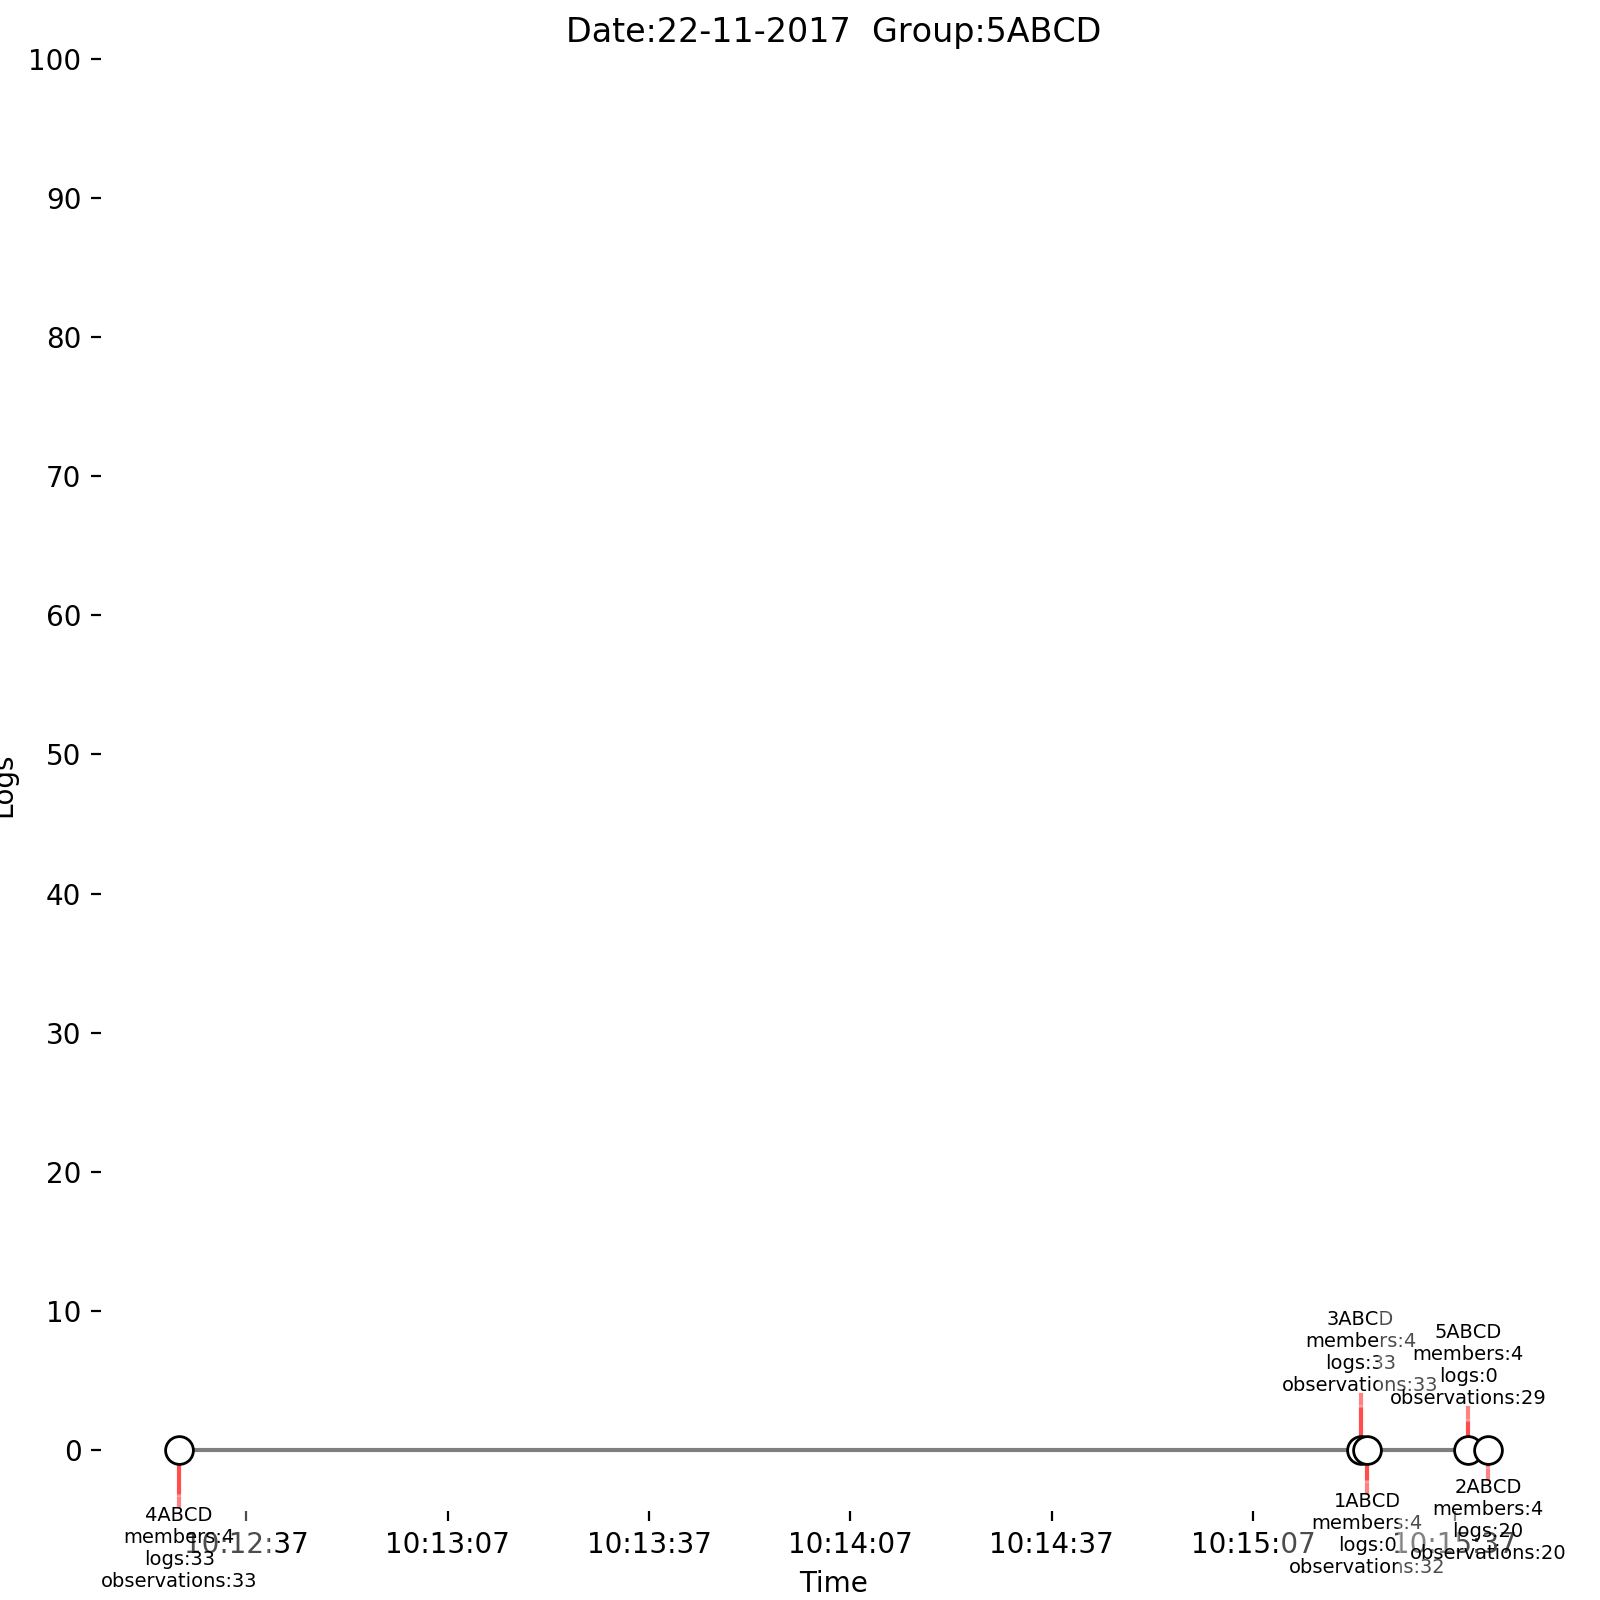

start: 2017-11-22 10:12:27 stop: 2017-11-22 10:15:42
4ABCD   2017-11-22 10:12:27
3ABCD   2017-11-22 10:15:23
1ABCD   2017-11-22 10:15:24
5ABCD   2017-11-22 10:15:39
2ABCD   2017-11-22 10:15:42


In [123]:
import matplotlib.dates as mdates
import operator
import collections
x = {1: 2, 3: 4, 4: 3, 2: 1, 0: 0}

date1 = '22-11-2017'

tdata = data_22nov.copy()

duration, start_time = getDuration(tdata)
group_len = getInfoProjectDays(tdata)
logs,obs = getEntries(tdata)


levels = np.array([ -4,4,-3, 3, -2, 2])
fig, ax = plt.subplots(figsize=(8, 8))


start_time = sorted(start_time.items(), key=operator.itemgetter(1))


names = [x[0] for x in start_time]
dates = [x[1] for x in start_time]
dates = [datetime.strptime(ii, "%Y-%m-%d %H:%M:%S") for ii in dates]

# Create the base line
start = min(dates)
stop = max(dates)

print 'start:',start,'stop:',stop
ax.plot((start, stop), (0, 0), 'k', alpha=.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_yaxis().set_ticks([])
for i, (group,date) in enumerate(zip(names,dates)):
    print group,' ',date
    level = levels[i % 6]
    vert = 'top' if level < 0 else 'bottom'
    ax.scatter(date, 0, s=100, facecolor='w', edgecolor='k', zorder=9999)
    # Plot a line up to the text
    ax.plot((date, date), (0, level), c='r', alpha=.7)
    # Give the text a faint background and align it properly
    ax.text(date, level, group+'\nmembers:'+str(group_len[group])+'\nlogs:'+str(logs[group])+'\nobservations:'+str(obs[group]),
            horizontalalignment='center', verticalalignment=vert, fontsize=7,
            backgroundcolor=(1., 1., 1., .3))
plt.title('Timeline graph %s'%date1)
plt.xlabel('Time')
plt.savefig('1_Teacher_%s'%date1)
plt.tight_layout()
plt.show()

### 2.2 Bar graph with the average value of group

<IPython.core.display.Javascript object>


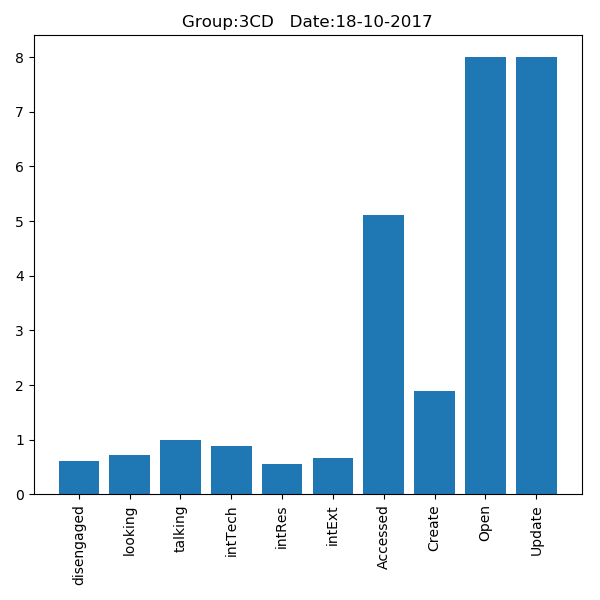

2_Teacher_18-10-2017_3CD


In [129]:
group = '3CD'
date = '18-10-2017'
tdata = data_18oct.copy()
tdata.drop(tdata.columns[0],axis=1,inplace=True)
group1 = tdata.loc[tdata.group == group,:]

avg_values = []
for attr in group1.columns[2:]:
    avg_values.append(group1[attr].mean())

plt.figure(figsize=(6,6))
plt.bar(np.arange(len(avg_values)),avg_values)
plt.xticks(np.arange(len(avg_values)), group1.columns[2:], rotation='vertical')
plt.title('Group:%s   Date:%s'%(group,date))
plt.tight_layout()

plt.show()
title = '2_Teacher_%s_%s'%(date,group)
print title
plt.savefig(title)

In [183]:
print data_22nov.group.unique()
data_22nov['timestamp'] = pd.to_datetime(data_22nov['timestamp'])

['1ABCD' '2ABCD' '3ABCD' '4ABCD' '5ABCD']


## 2.3 Line graph with raw values

<IPython.core.display.Javascript object>


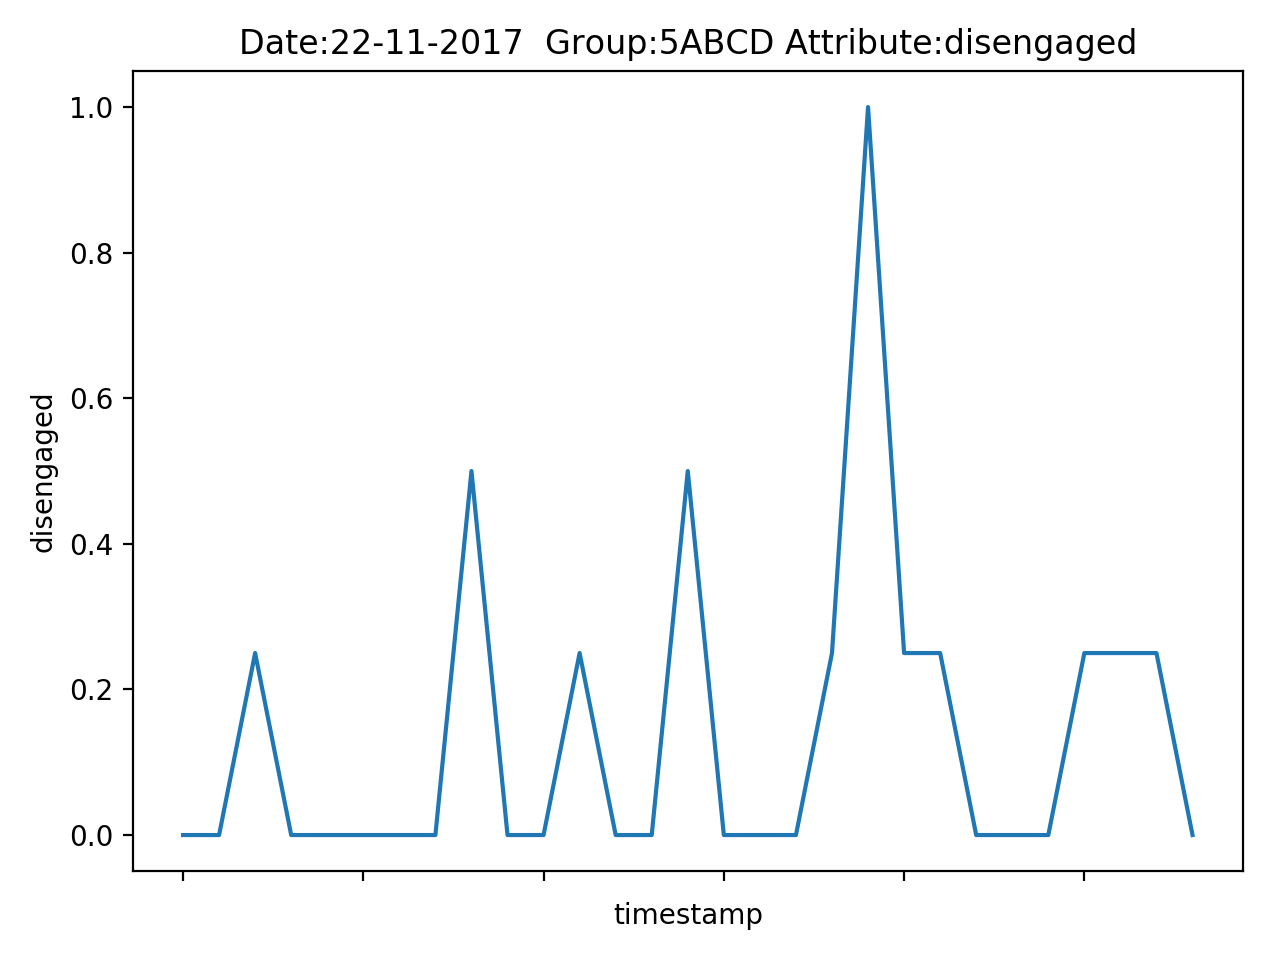

<IPython.core.display.Javascript object>


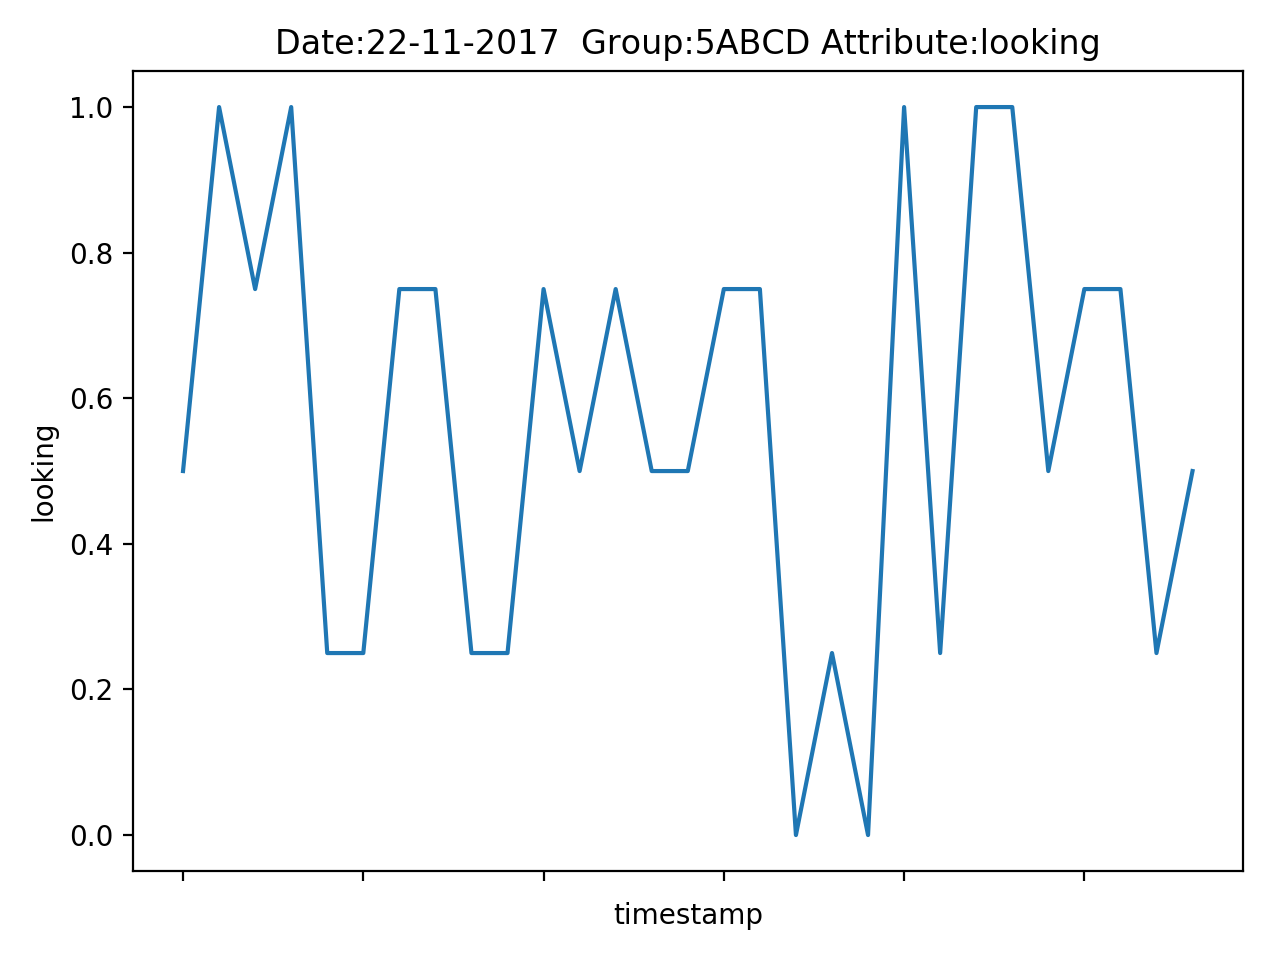

<IPython.core.display.Javascript object>


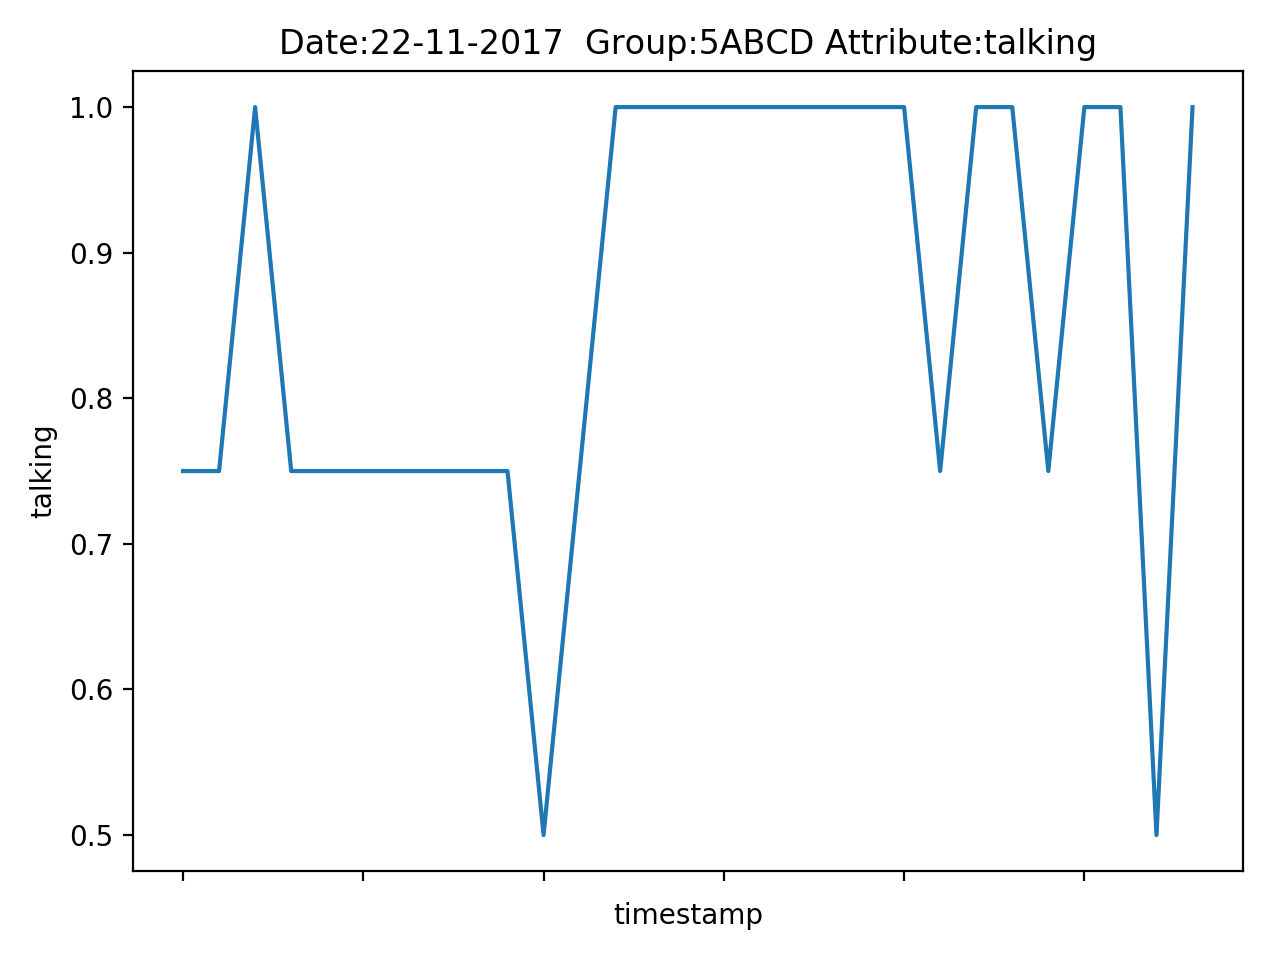

<IPython.core.display.Javascript object>


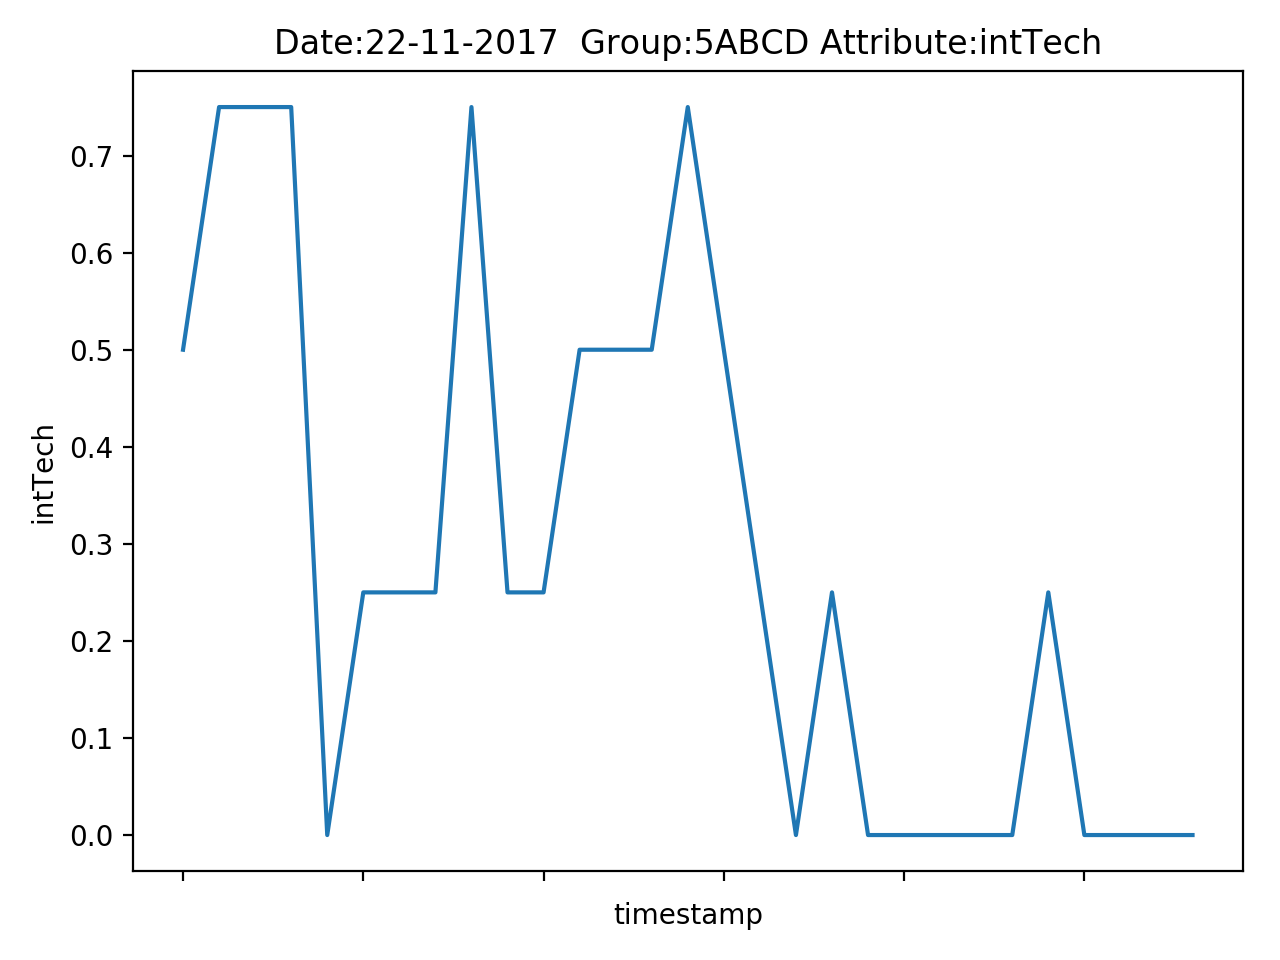

<IPython.core.display.Javascript object>


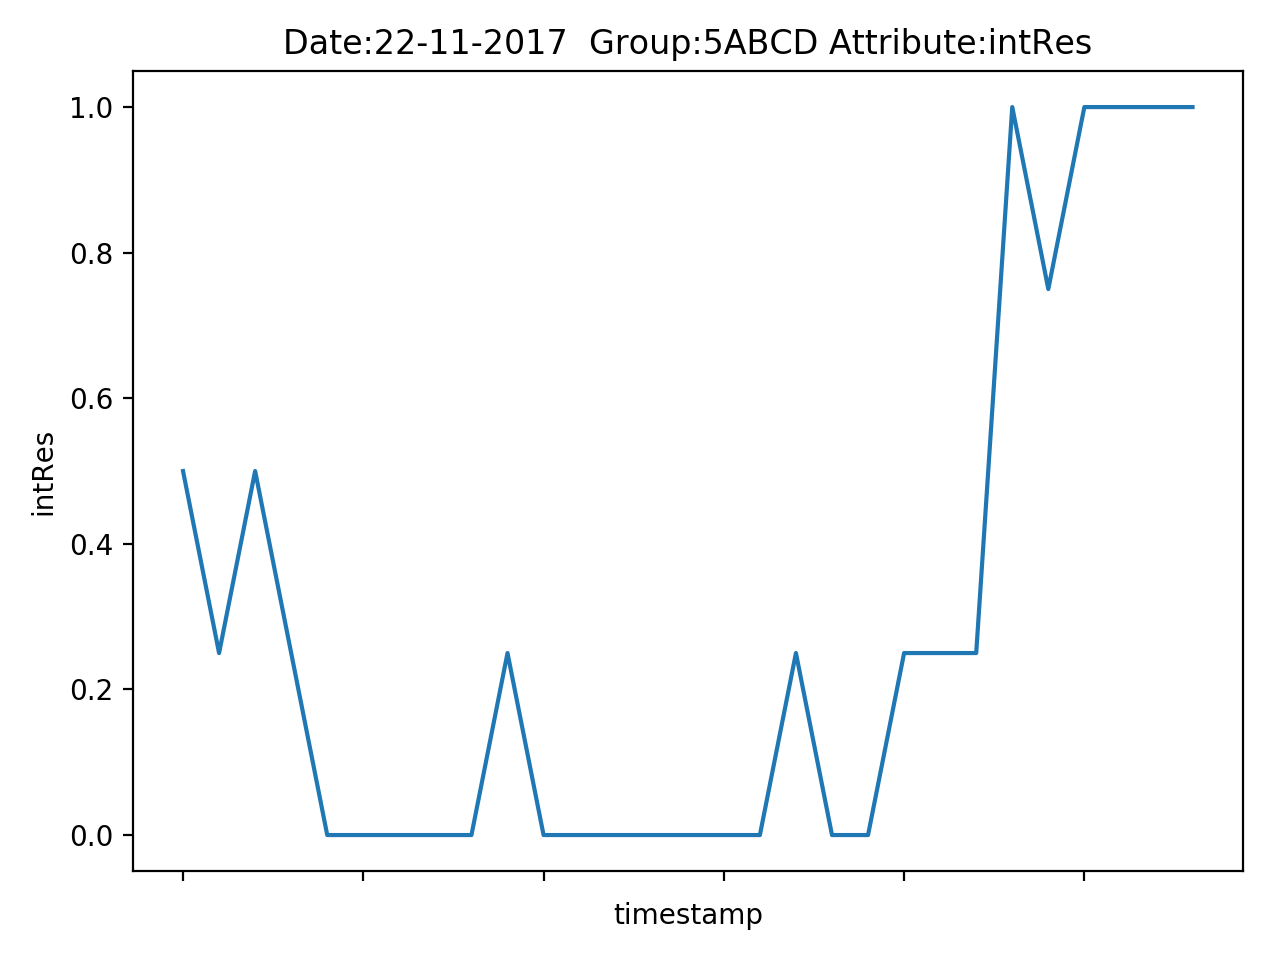

<IPython.core.display.Javascript object>


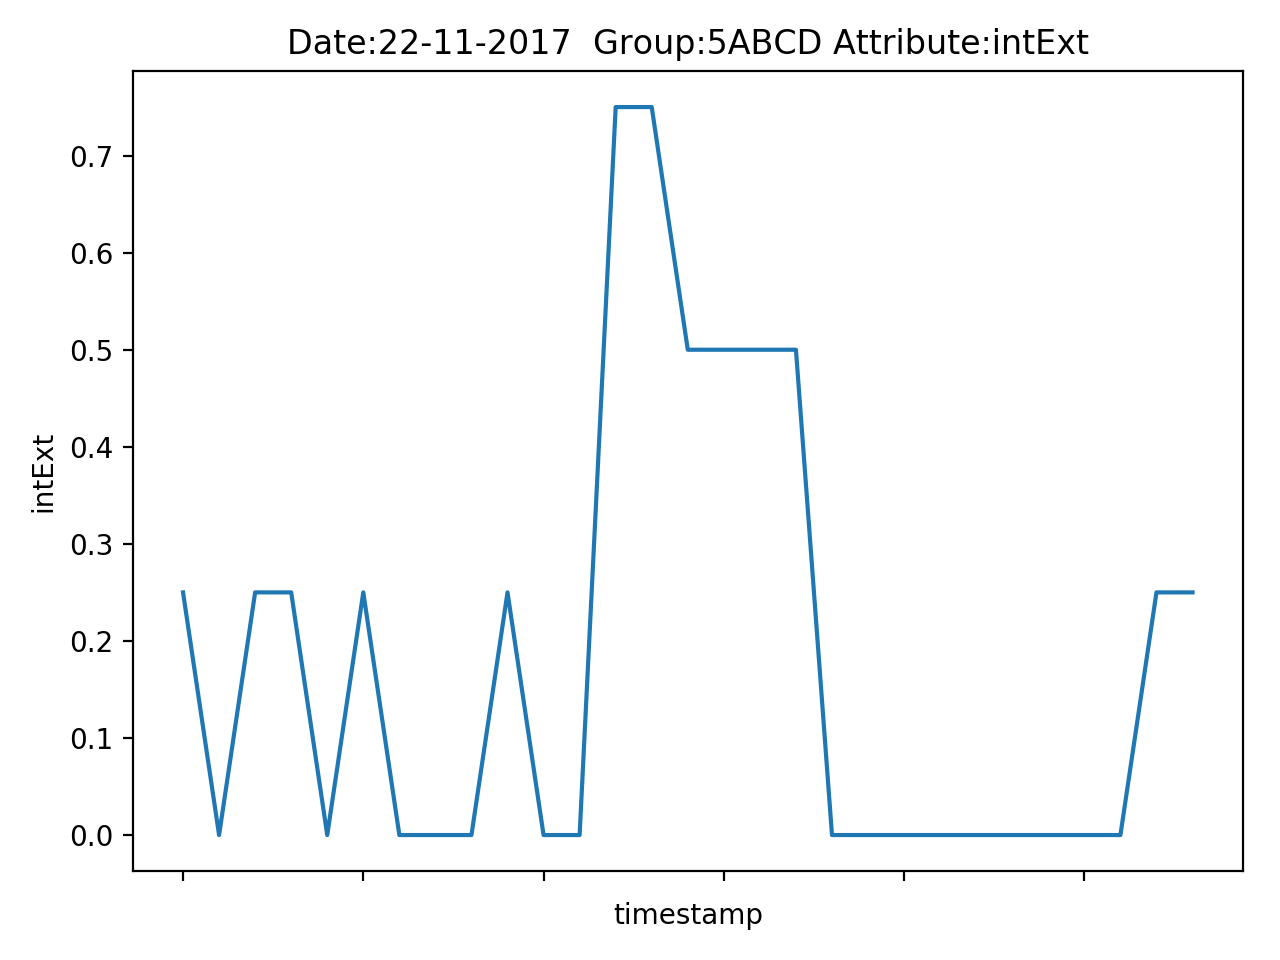

In [125]:
group = '5ABCD'
date = '22-11-2017'
tdata = data_22nov.copy()


tdata.drop(tdata.columns[0],axis=1,inplace=True)

group_frame = tdata.loc[tdata.group==group,:]


for attr in group_frame.columns[2:-4]:
    group_frame.plot('timestamp',attr,legend=False)
    title = '3_Teacher_%s_%s_%s'%(date,group,attr)
    plt.ylabel(attr)
    plt.title('Date:%s  Group:%s Attribute:%s'%(date,group,attr))
    plt.savefig(title)
    plt.tight_layout()
#plt.show()


## 2.4 Line graph sum of logs and observations

In [124]:

date = '22-11-2017'

tdata = data_22nov.copy()
tdata.fillna(value=0,inplace=True)
tdata['timestamp'] = pd.to_datetime(tdata['timestamp'])
tdata.drop(tdata.columns[0],axis=1,inplace=True)
tdata.eval('obs = looking + talking + intTech + intRes + intExt - disengaged',inplace=True)
tdata.eval('logs = Accessed + Create + Open + Update',inplace=True)
for group in tdata.group.unique():
    attr = 'logs'
    group1 = tdata.loc[tdata.group == group,:]
    #group1.plot('timestamp',attr,legend=False)
    title = '4_Teacher_%s_%s_'%(date,group)
    plt.ylabel('Logs')
    plt.yticks(np.arange(0,110,10))
    plt.title('Date:%s  Group:%s'%(date,group))
    plt.savefig(title+'logs')
    plt.tight_layout()
    


## Story Telling Prototype
First, we will need to calculate two new measures for each timestamp: a) Behavioral engagement (BE): scale all log features and all positive observation features, so that they have a [0,1] range -- then average them; b) Behavioral disaffection (BD): Scale the disengaged observation feature to [0,1], create a new feature that has a value of 1 when the total logs are =0 (and zero otherwise), and average both.
1. A table with the overall (average) values of BE and BD for each group, and for the overall class
2. A linegraph with the values of BE over time of a group. Same for BD. On these, we may want to add some kind of labels in extreme values (possibly by hand)
3. A linegraph with the average value of BE of the whole class, over time (to show when no group is selected). Same for BD. On these, we may want to add some kind of labels in extreme values (possibly by hand)

In [127]:
# scaling logs
from sklearn import preprocessing

In [145]:
std = preprocessing.MinMaxScaler()

In [231]:

date = '8-11-2017'
tdata = data_8nov.copy()

logs = tdata.loc[:,'disengaged':]
scaled_data = std.fit_transform(logs)
tdata['BE'] = np.nanmean(scaled_data[:,1:],axis=1)
tdata['disengaged'] = scaled_data[:,0]
log = np.nanmean(scaled_data[:,6:],axis=1)
tdata ['new'] = np.nan_to_num(log)
tdata ['new1'] = 0

tdata.loc[tdata['new']>0,'new1'] = 1
tdata.eval('BD = (new1 + disengaged)/2',inplace=True)

In [232]:
temp_frame = tdata
print 'Average value for BE and BD for each group '
group_list=[]
be_mean =[]
bd_mean = []
for group in temp_frame.group.unique():
    temp_g = temp_frame.loc[temp_frame.group == group,:]
    group_list.append(group)
    be_mean.append(temp_g['BE'].mean())
    bd_mean.append(temp_g['BD'].mean())
    print group,' ',temp_g['BE'].mean(),temp_g['BD'].mean()
    
dd = pd.DataFrame({'avg_BD':bd_mean,'avg_BE':be_mean,'group':group_list,})
dd.to_csv('1_Story_%s.csv'%date)


Average value for BE and BD for each group 
1ABCD   0.432326882632 0.45
2ABCD   0.460972523046 0.45
3ABCDE   0.343692451162 0.458333333333
4ABCDE   0.222404373014 0.5


### 3.2 A linegraph with the values of BE over time of a group. Same for BD

<IPython.core.display.Javascript object>


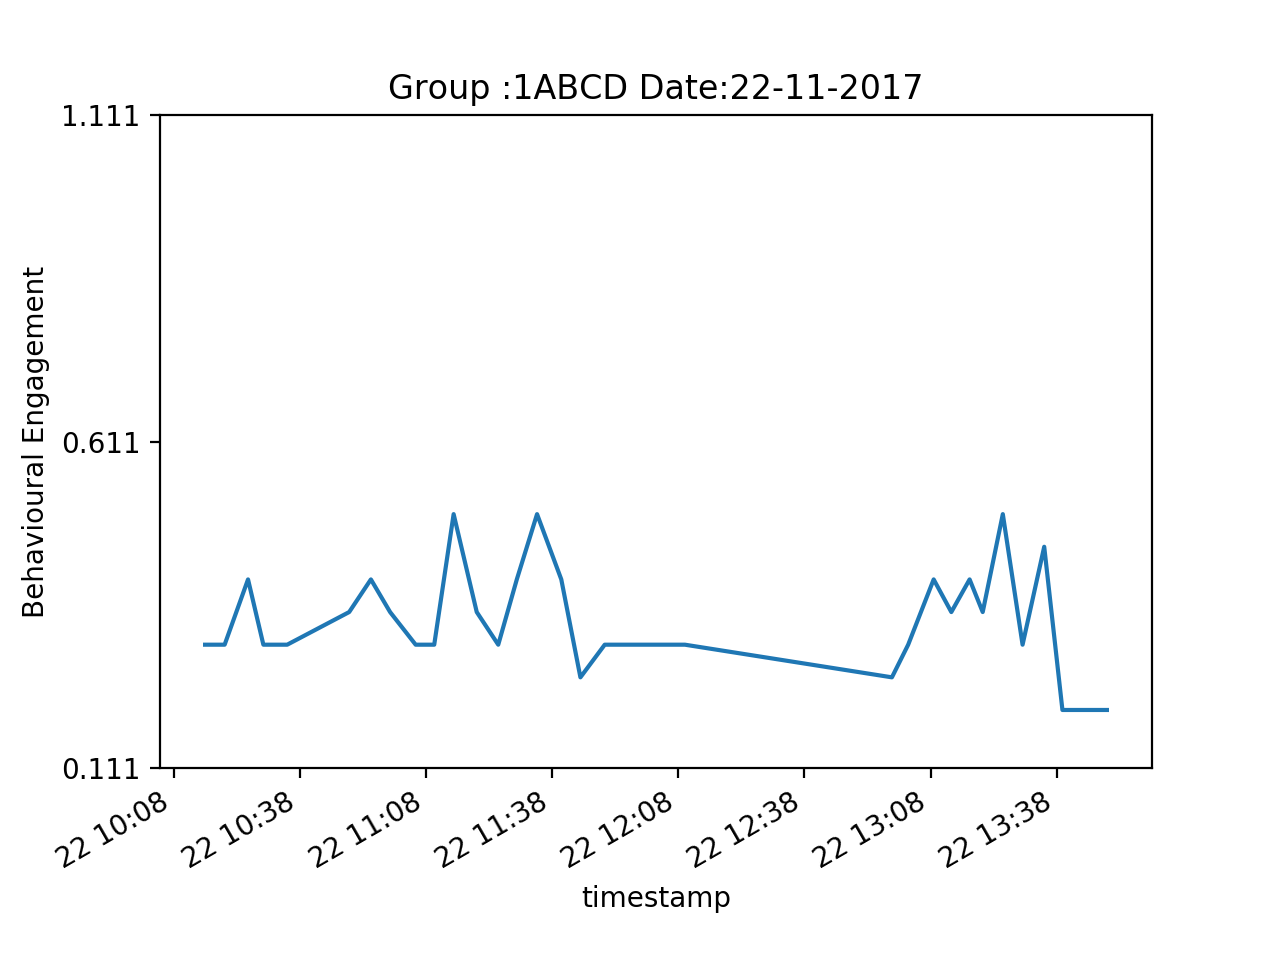

<IPython.core.display.Javascript object>


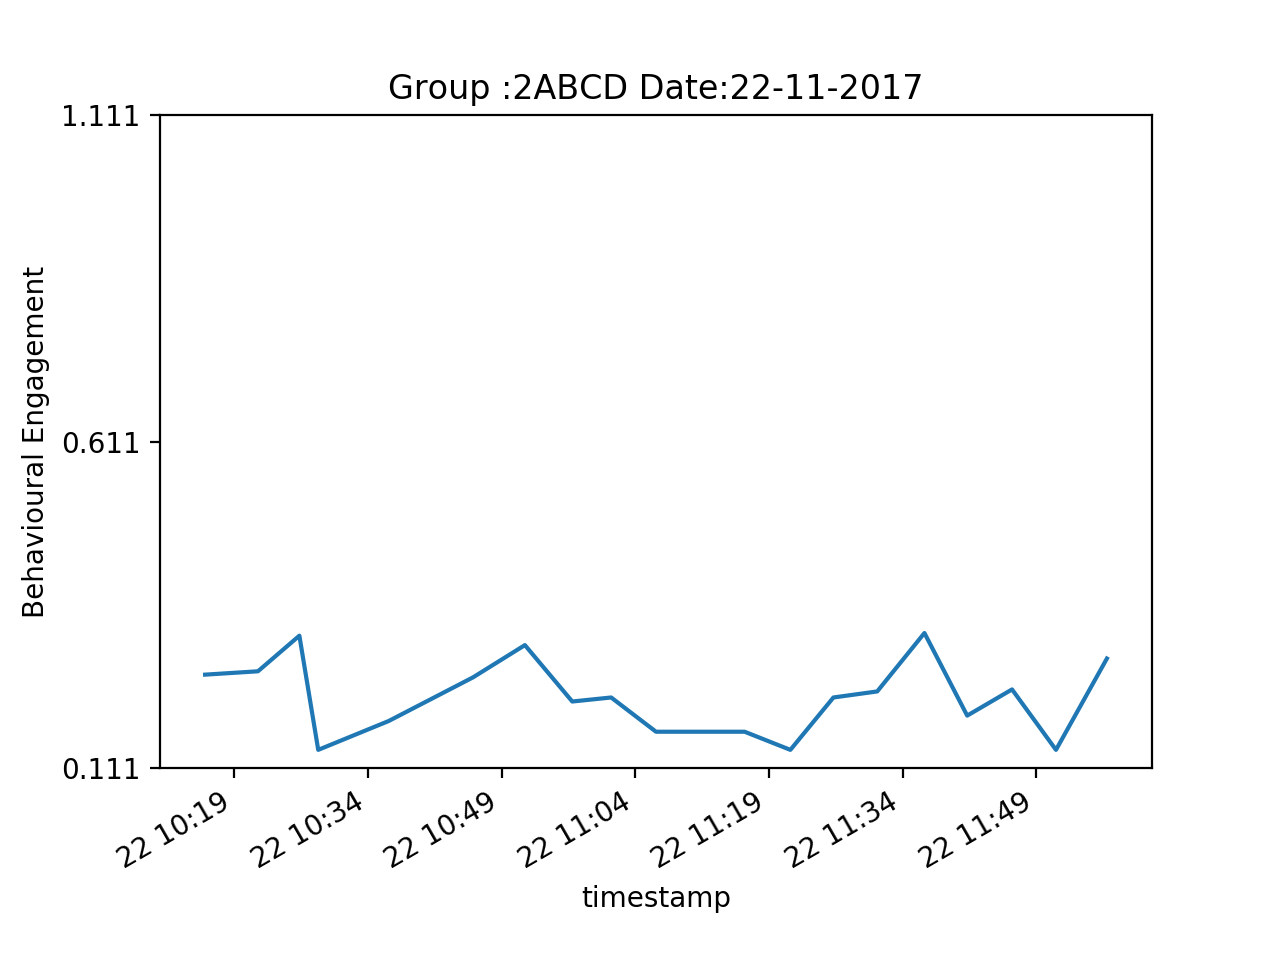

<IPython.core.display.Javascript object>


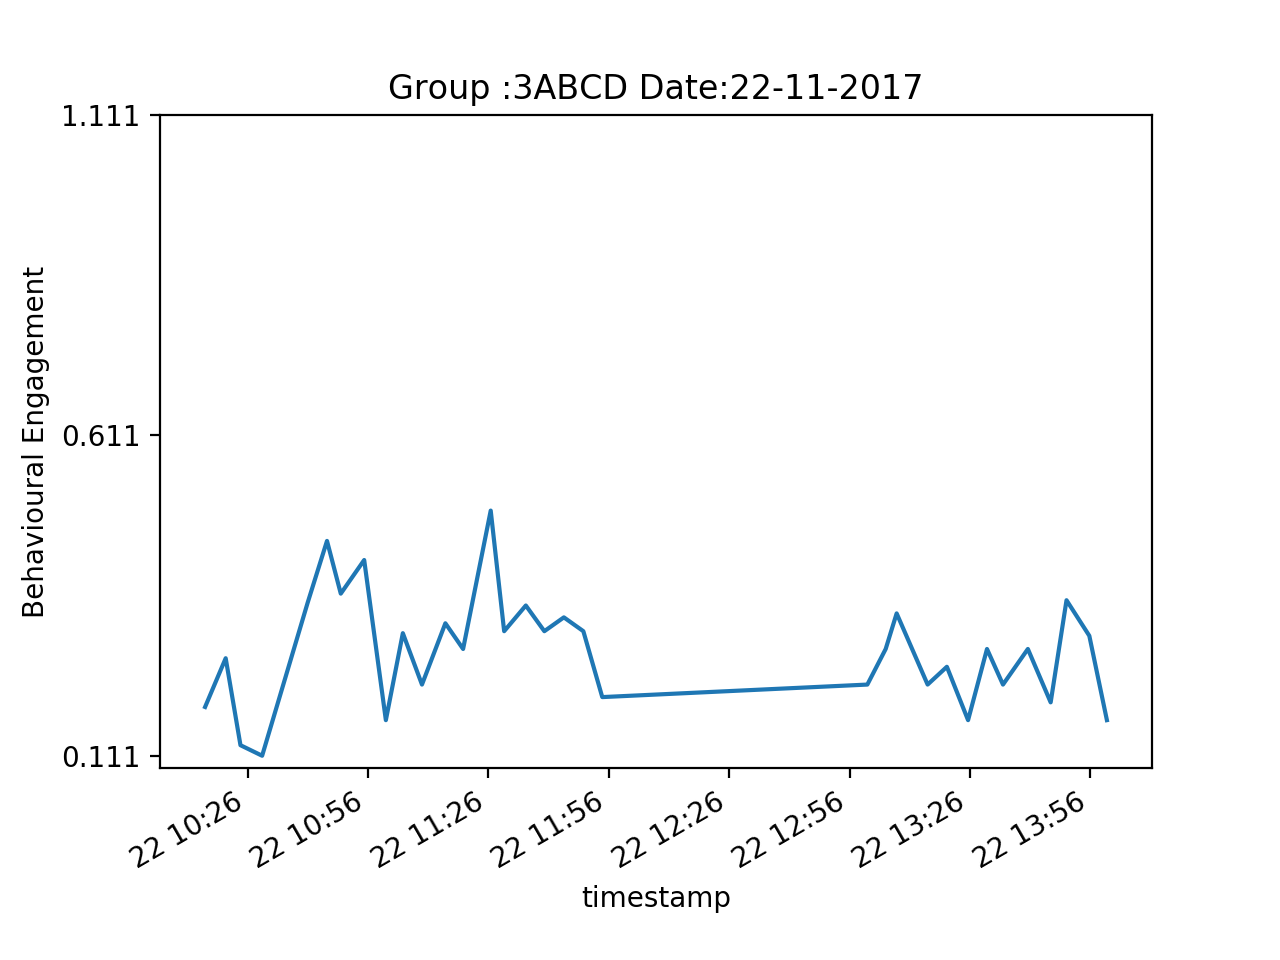

<IPython.core.display.Javascript object>


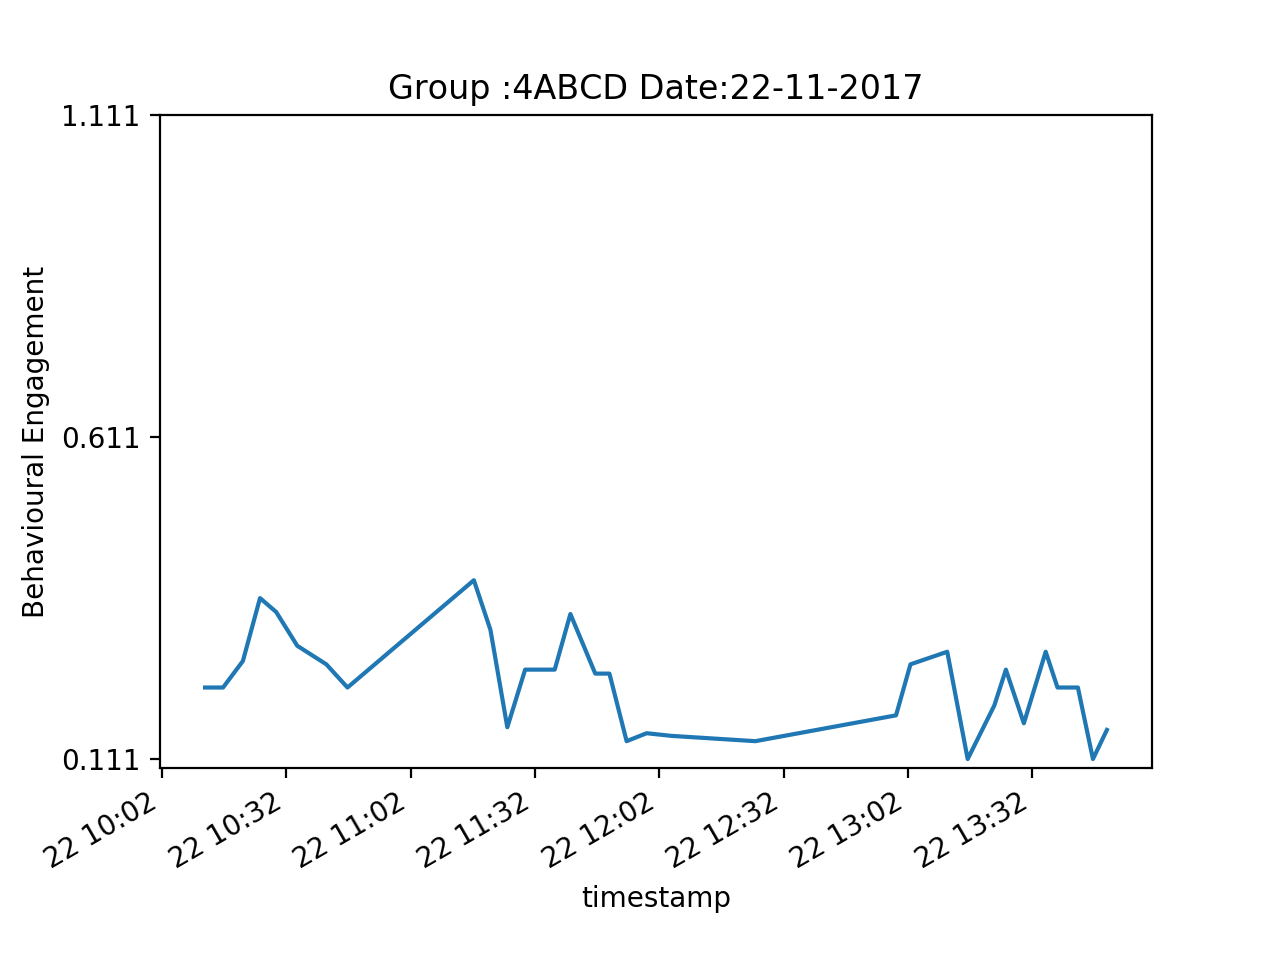

<IPython.core.display.Javascript object>


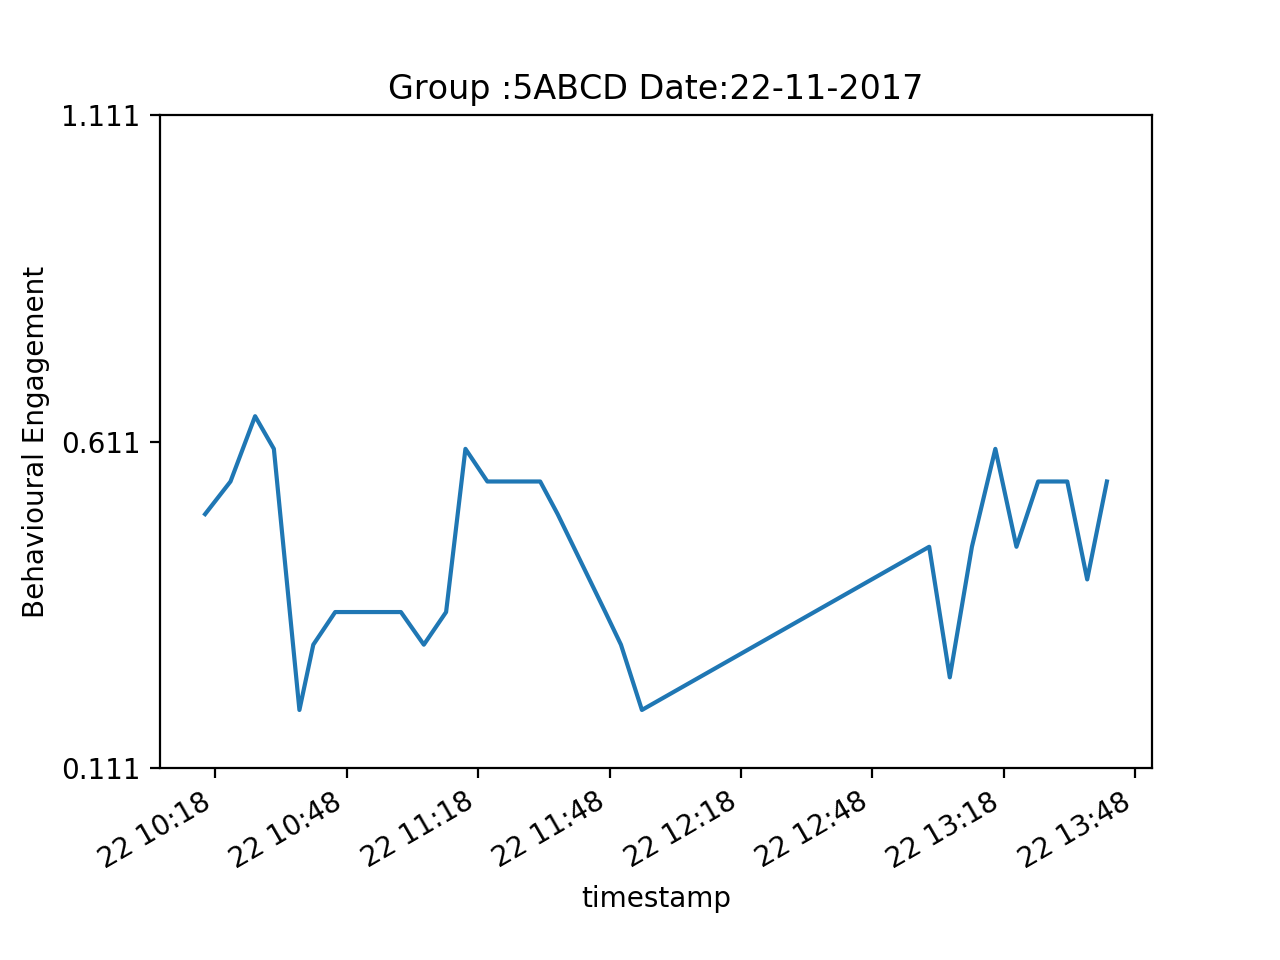

<IPython.core.display.Javascript object>


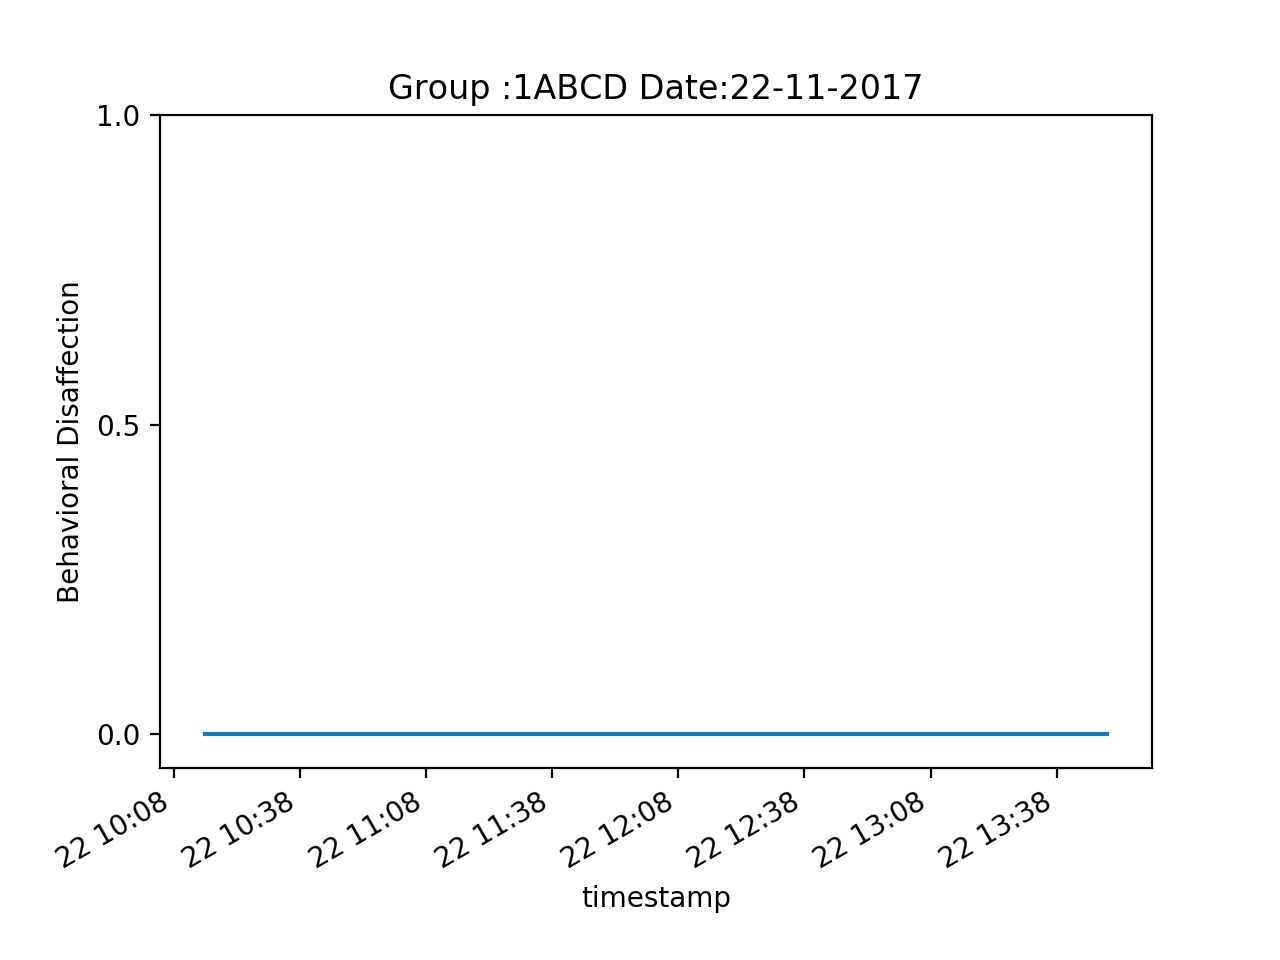

<IPython.core.display.Javascript object>


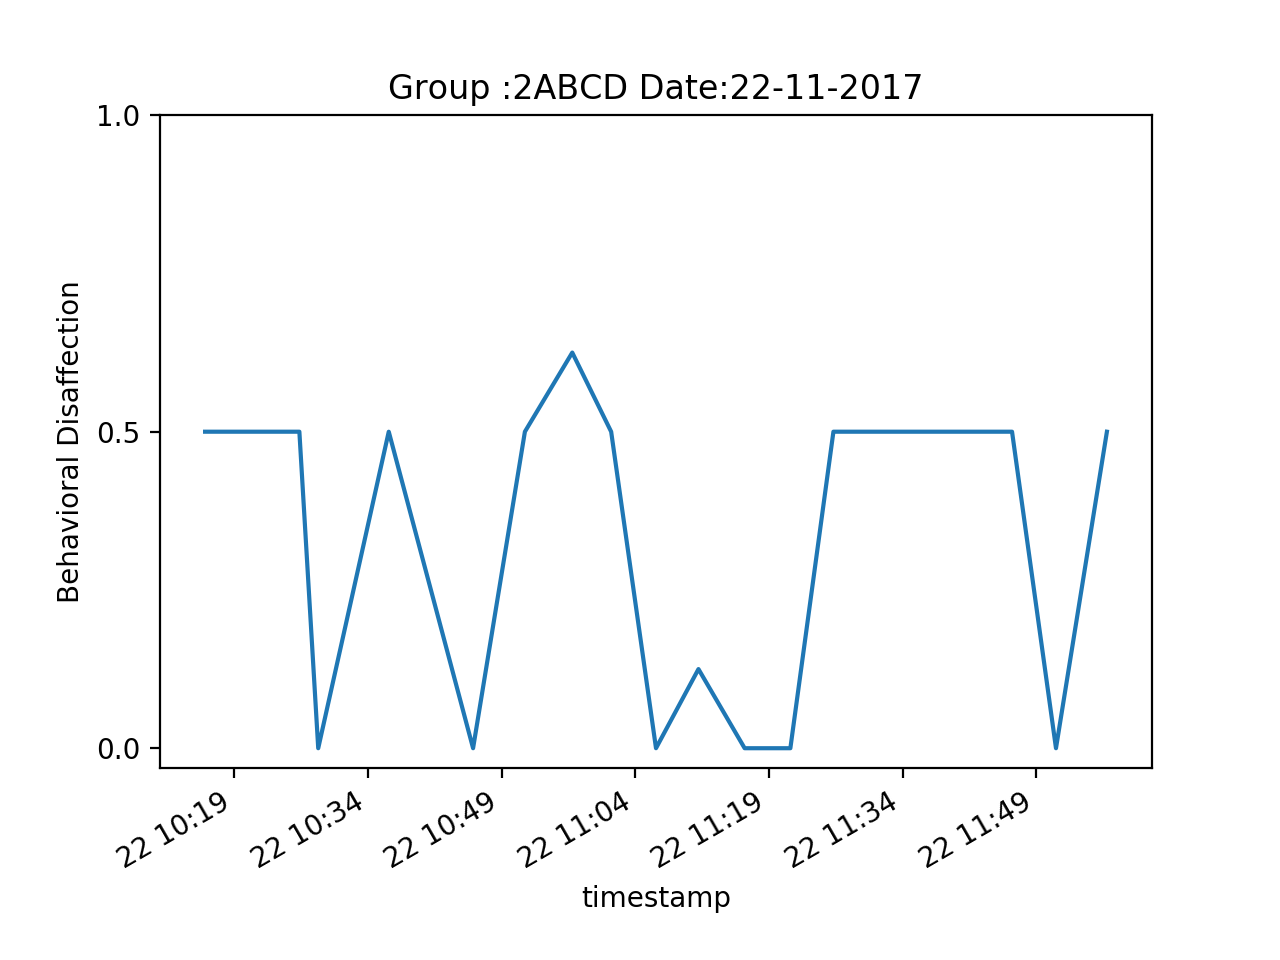

<IPython.core.display.Javascript object>


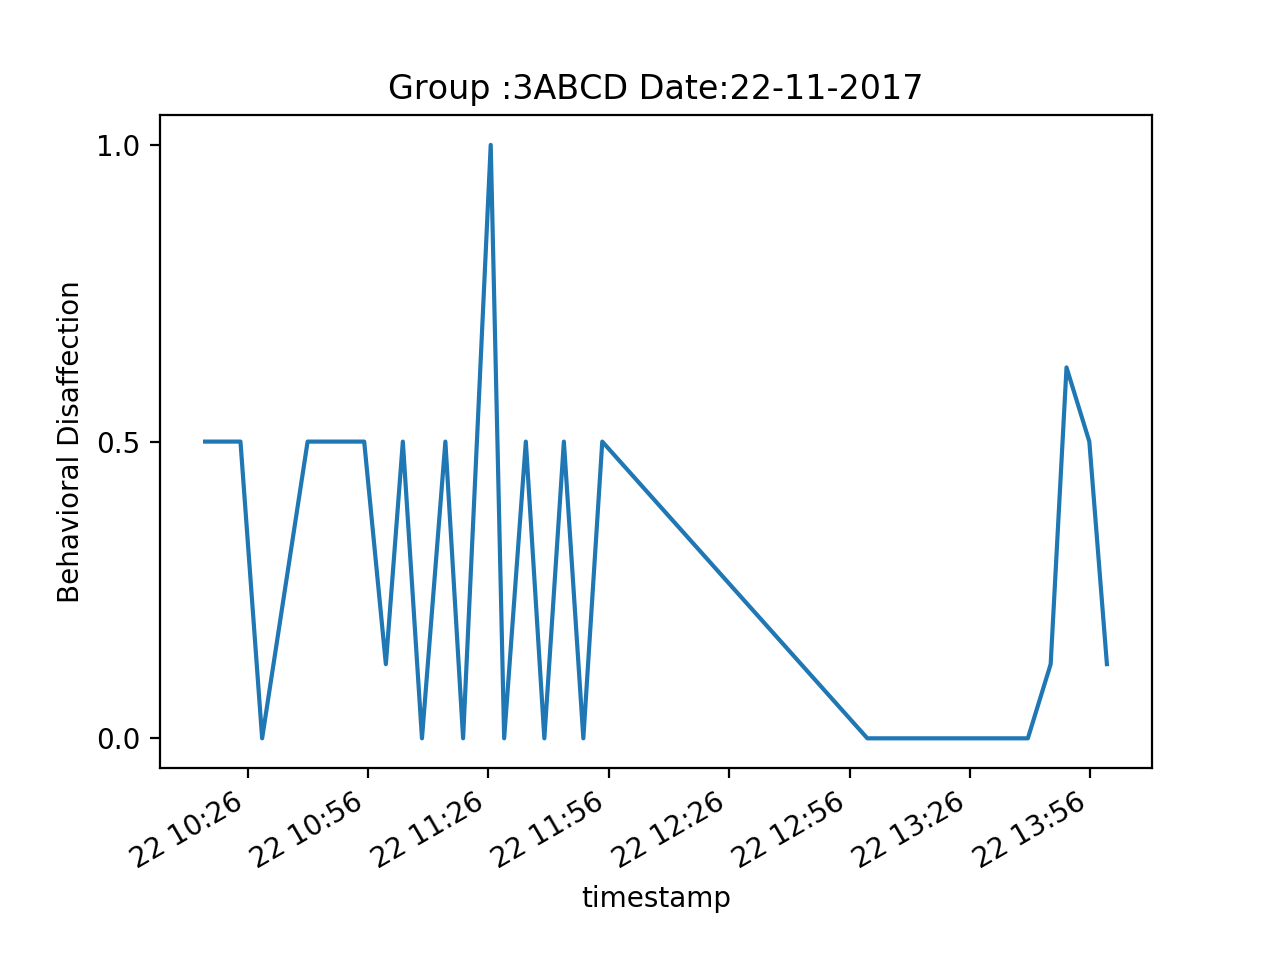

<IPython.core.display.Javascript object>


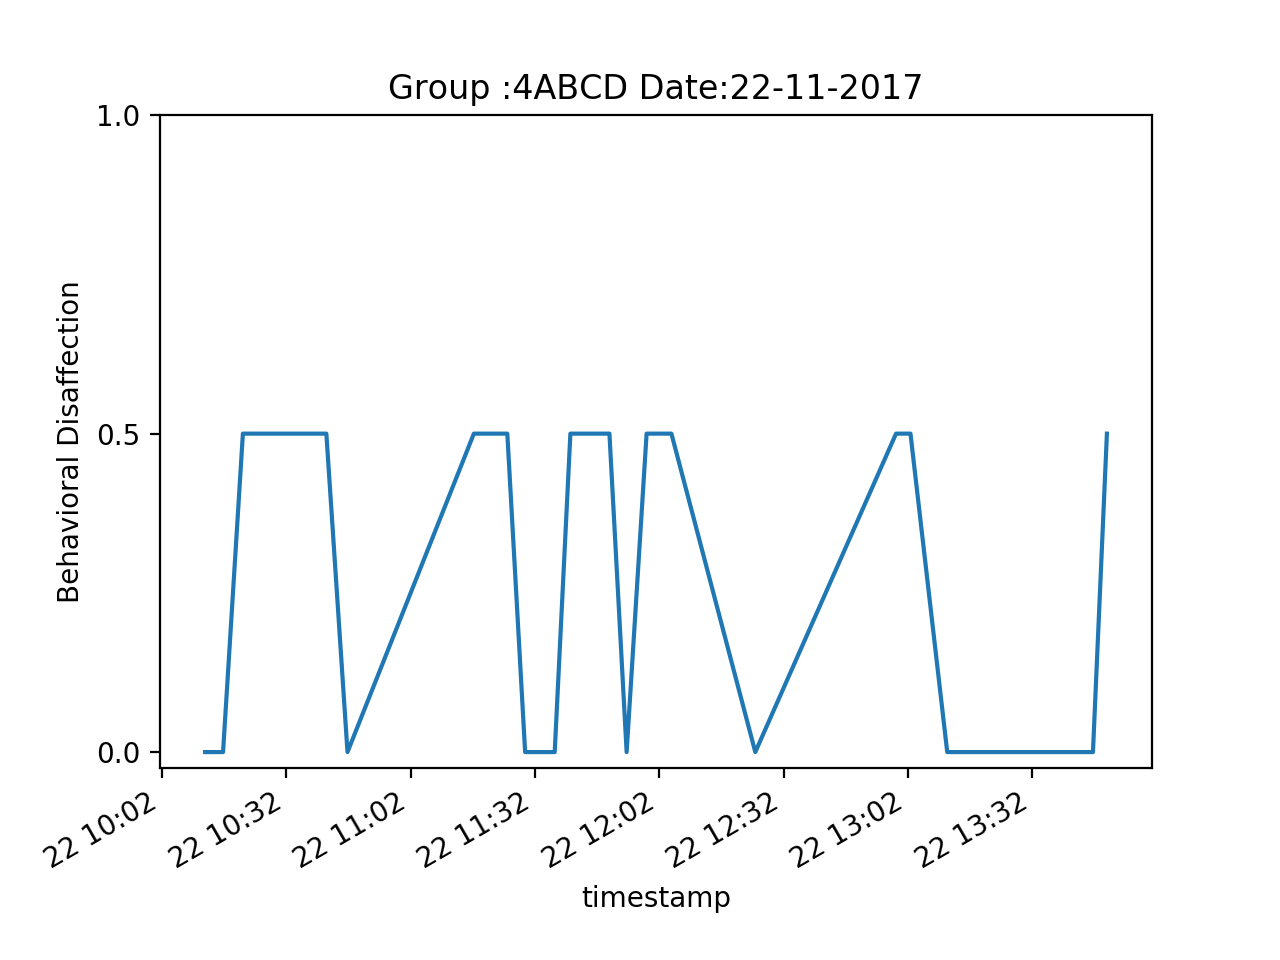

<IPython.core.display.Javascript object>


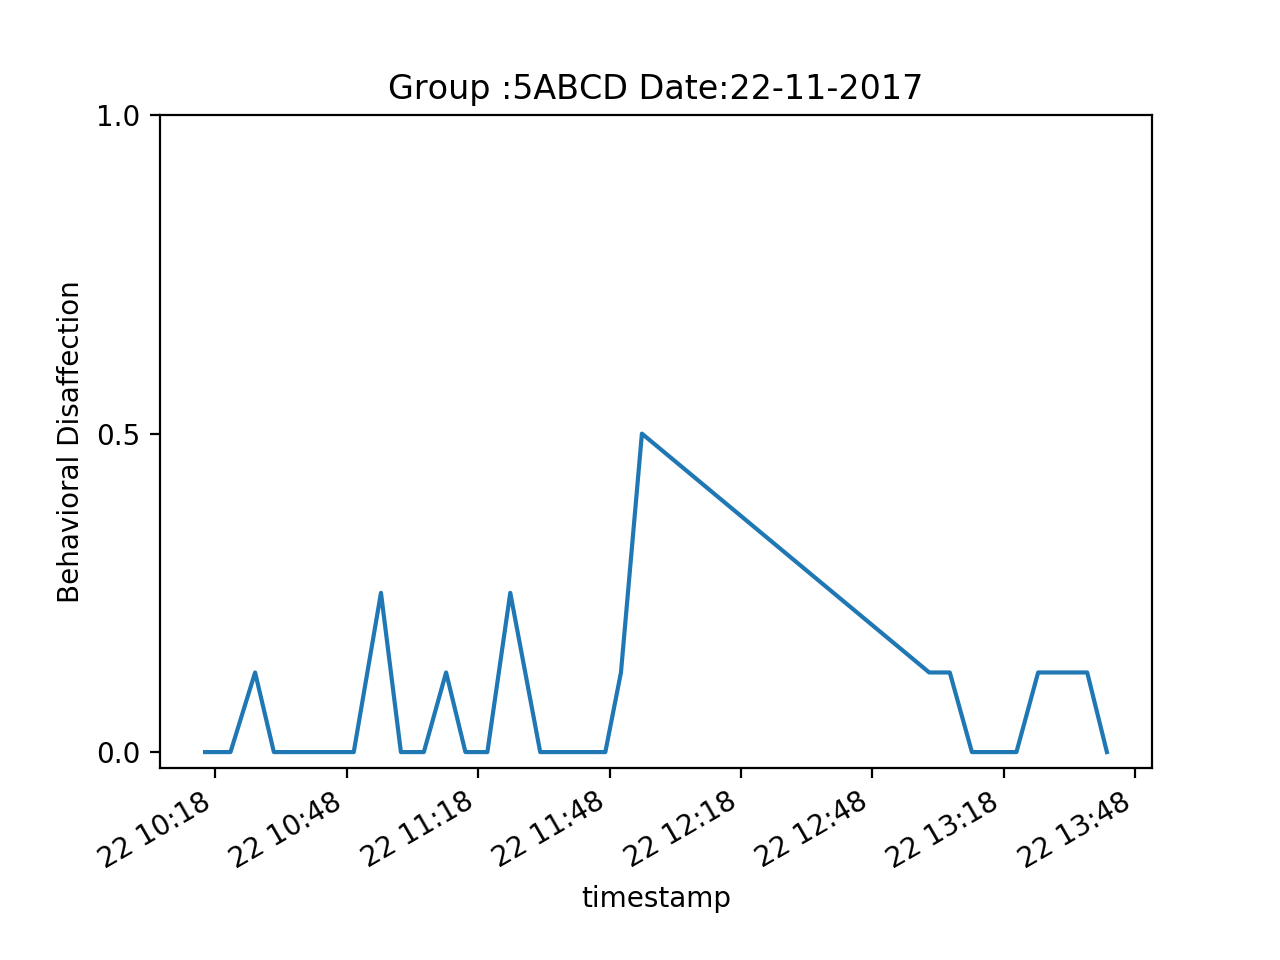

In [214]:
attr_list = ['BE','BD']
temp_frame['timestamp'] = pd.to_datetime(temp_frame['timestamp'])
for attr in attr_list:
    min_be = temp_frame[attr].min() 
    max_be = temp_frame[attr].max()
    for group in temp_frame.group.unique():
        temp_g = temp_frame.loc[temp_frame.group == group,:]
        temp_g.plot('timestamp',attr,legend=None)
        plt.yticks(np.arange(min_be,max_be+.5,.5))
        if attr == 'BE':
            label = 'Behavioural Engagement'
        else:
            label = 'Behavioral Disaffection'
        plt.ylabel(label)
        plt.title('Group :%s Date:%s'%(group,date))
        plt.savefig('2_Story_%s_%s_%s'%(group,date,attr))
plt.show()

### 3.3 A linegraph with the average value of BE of the whole class, over time (to show when no group is selected). Same for BD. On these, we may want to add some kind of labels in extreme values (possibly by hand)

<IPython.core.display.Javascript object>


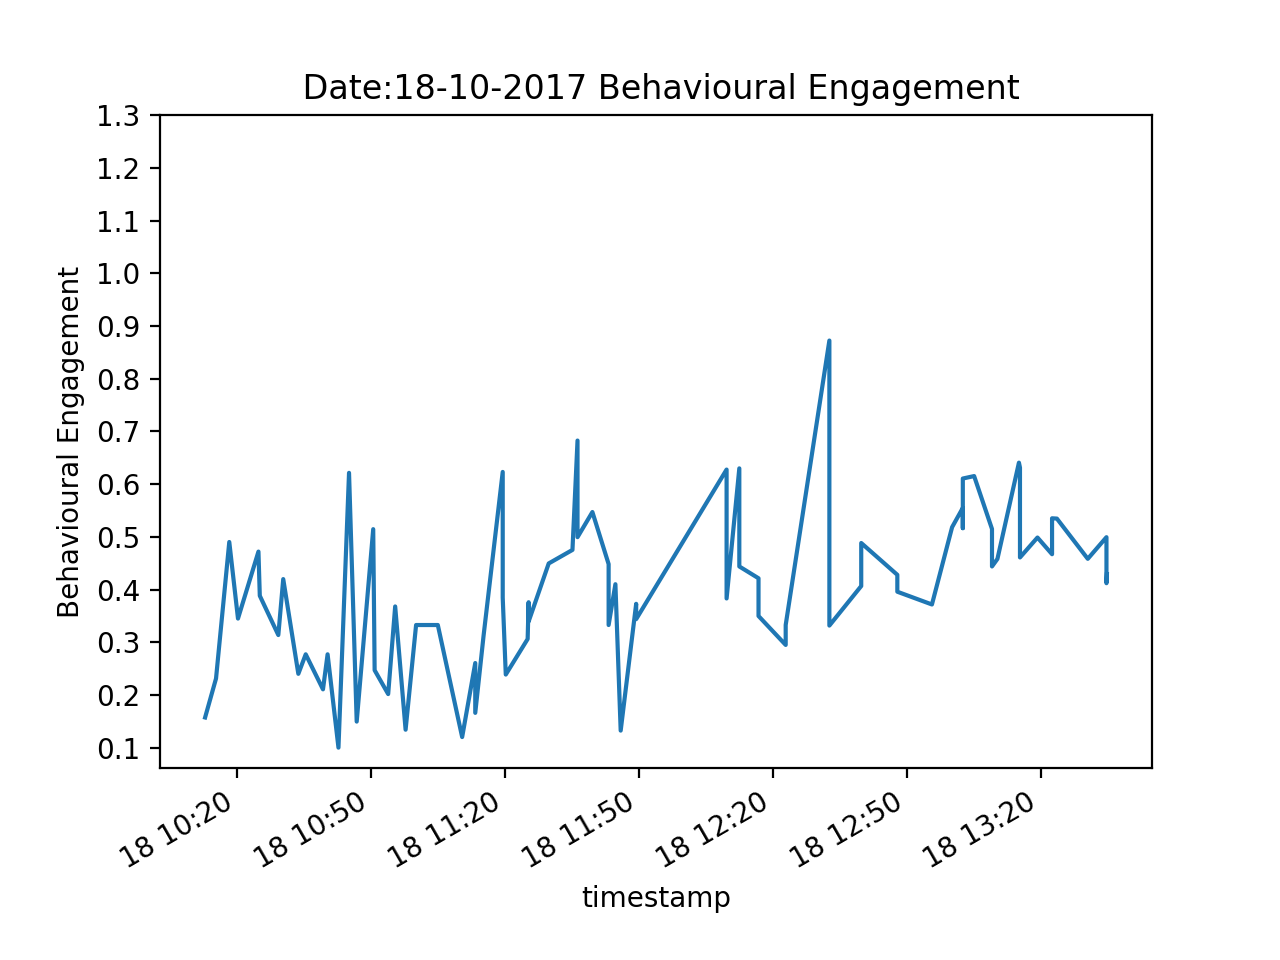

<IPython.core.display.Javascript object>


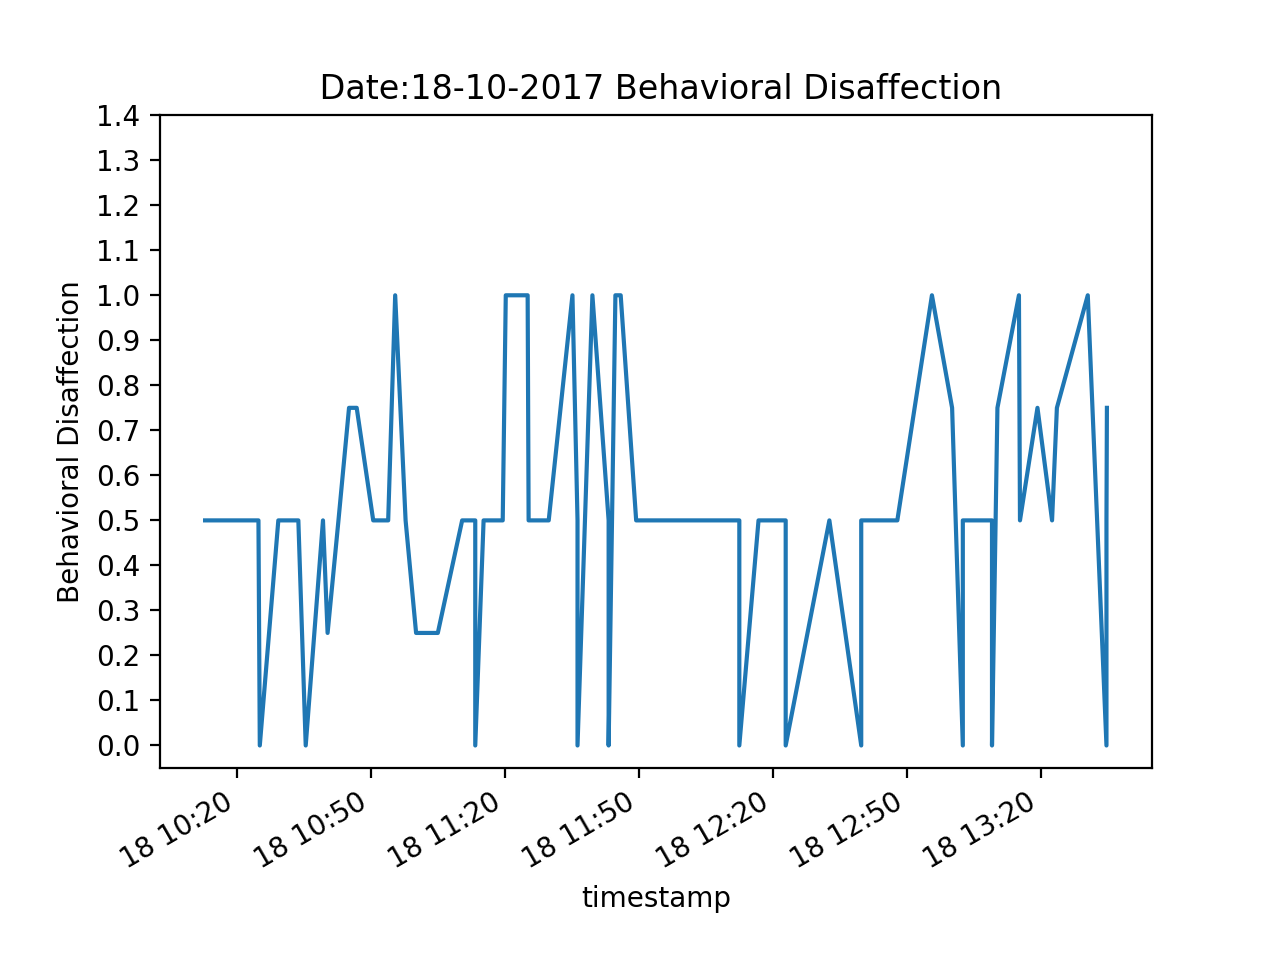

In [223]:
attr_list = ['BE','BD']
temp_frame['timestamp'] = pd.to_datetime(temp_frame['timestamp'])
for attr in attr_list:
    min_be = temp_frame[attr].min() 
    max_be = temp_frame[attr].max()
    temp_frame.plot('timestamp',attr,legend=None)
    plt.yticks(np.arange(min_be,max_be+.5,.1))
    if attr == 'BE':
        label = 'Behavioural Engagement'
    else:
        label = 'Behavioral Disaffection'
    plt.ylabel(label)
    plt.title(' Date:%s %s'%(date,label))
    plt.savefig('3_Story_%s_%s'%(date,attr))
plt.show()